In [2456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import matplotlib


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
pca = PCA()

from sklearn import svm
from xgboost import XGBRegressor


from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [2025]:
train_df = pd.read_csv('~/Documents/Bootcamp/Project_3_ML/train.csv')

In [2026]:
test_df = pd.read_csv('~/Documents/Bootcamp/Project_3_ML/test (1).csv')

In [2027]:
#columns with NAs in train set
train_df.columns[train_df.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [2028]:
#columns with NAs in test set 
test_df.columns[test_df.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [2029]:
train_nas = np.sum(train_df.isnull())
train_nas[train_nas > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [2030]:
train_df.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
5       2009
6       2007
7       2009
8       2008
9       2008
10      2008
11      2006
12      2008
13      2007
14      2008
15      2007
16      2010
17      2006
18      2008
19      2009
20      2006
21      2007
22      2008
23      2007
24      2010
25      2009
26      2010
27      2010
28      2006
29      2008
        ... 
1430    2006
1431    2009
1432    2007
1433    2008
1434    2006
1435    2008
1436    2007
1437    2008
1438    2010
1439    2007
1440    2008
1441    2008
1442    2009
1443    2009
1444    2007
1445    2007
1446    2010
1447    2007
1448    2007
1449    2006
1450    2009
1451    2009
1452    2006
1453    2006
1454    2009
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [2031]:
train_df.shape

(1460, 81)

In [2032]:
test_df.shape

(1459, 80)

In [2033]:
1461+1459

2920

# EDA

In [2034]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [2035]:
print('The shape of our features is:', train_df.shape)

The shape of our features is: (1460, 81)


Text(0,0.5,'# NAs')

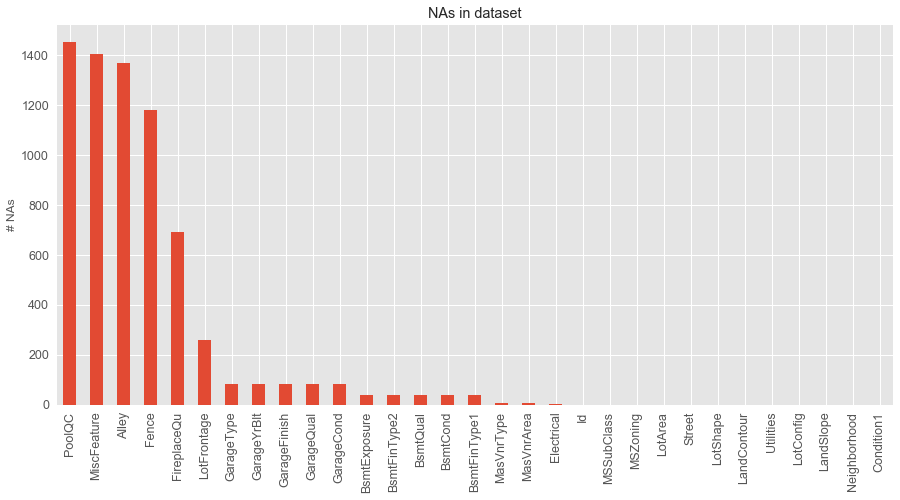

In [2036]:
#NAs in dataset by column 
train_nas = np.sum(train_df.isnull())
train_nas[train_nas > 0]


plot1 = train_nas.nlargest(31).plot(kind='bar', \
               title='NAs in dataset', figsize=(15,7))
plot1.set_ylabel('# NAs')

Text(0,0.5,'SalePrice')

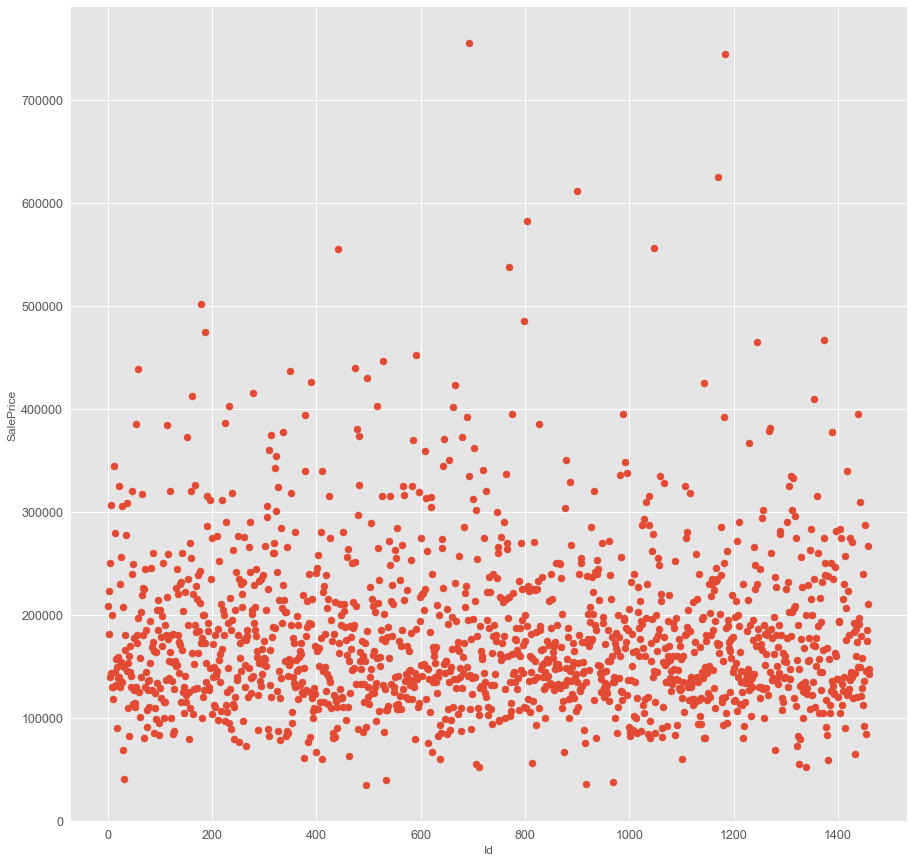

In [2037]:
n = 0
plt.figure(figsize=(15,15))
plt.scatter(train_df.iloc[:,n],train_df['SalePrice'])
plt.xlabel(train_df.columns[n])
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

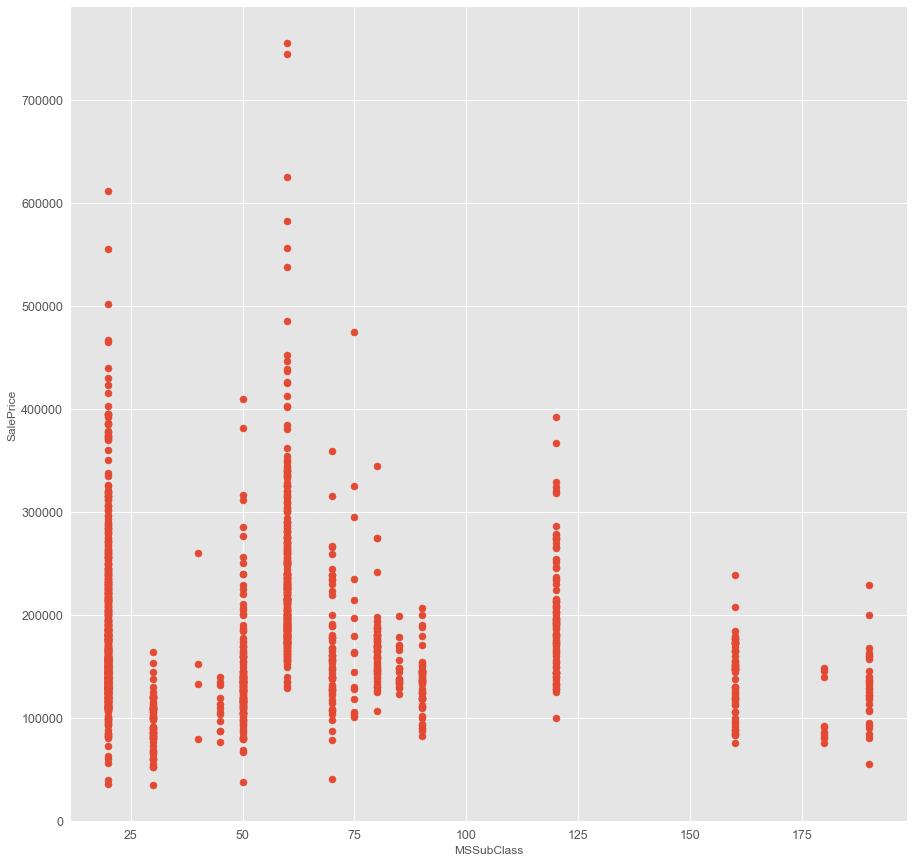

In [2038]:
n = 1
plt.figure(figsize=(15,15))
plt.scatter(train_df.iloc[:,n],train_df['SalePrice'])
plt.xlabel(train_df.columns[n])
plt.ylabel('SalePrice')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


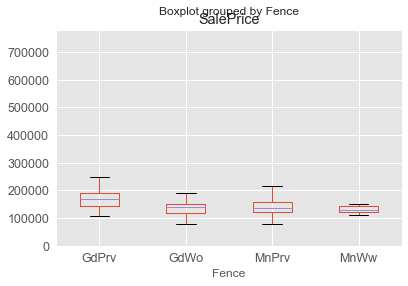

In [2039]:
train_df.boxplot(column='SalePrice', by='Fence')

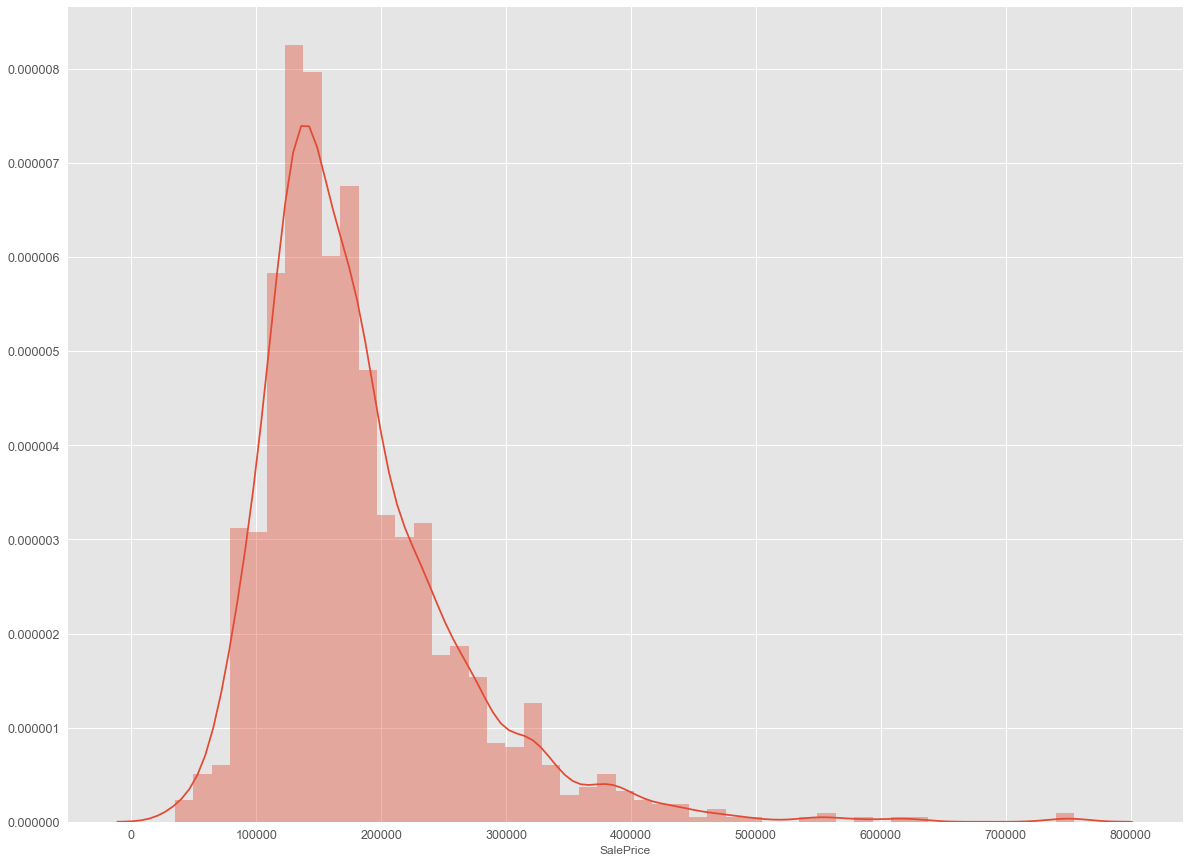

In [2040]:
plt.subplots(figsize=(20,15))
sns.distplot(train_df.SalePrice)
#sale price data is positive skewed 

Text(0,0.5,'SalePrice')

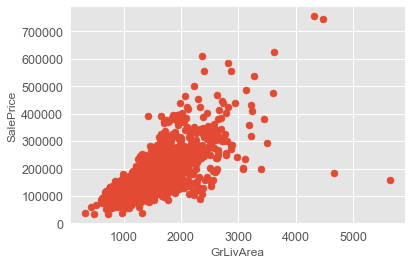

In [2041]:
#description text tells us there are outliers. specifically with sale price and GrLivArea 
#plot shows us 2 outliers on bottom right of scatterplot where GrLivArea is very large but sale price is extremely low
n = 46
plt.scatter(train_df.iloc[:,n],train_df['SalePrice'])
plt.xlabel(train_df.columns[n])
plt.ylabel('SalePrice')

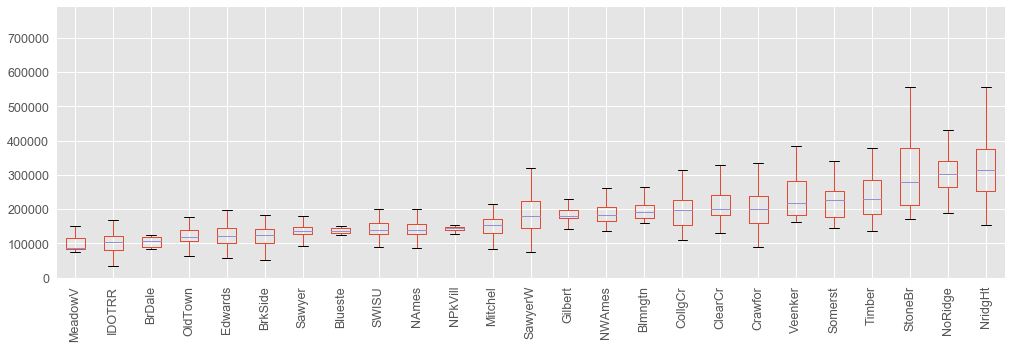

In [2042]:

#creating pandas boxplot and usinfg function to sort values
def boxplot_sorted(df, by, column, rot=90):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", figsize = (17,5))
axes = boxplot_sorted(train_df, by=["Neighborhood"], column="SalePrice")

#train.boxplot(column = 'SalePrice', by ='Neighborhood', figsize = (17,8), rot = 90) #pandas boxplot unsorted

# log transformation of target variable sale price


 mu = 12.02 and sigma = 0.40



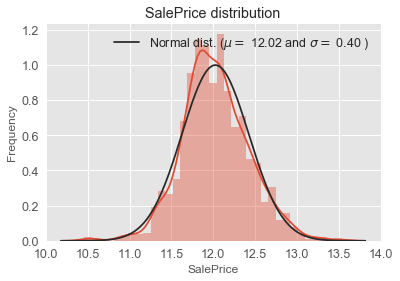

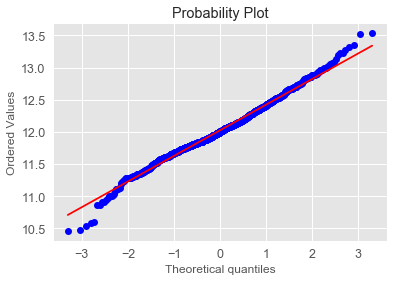

In [2043]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [2044]:
#train_df.loc[:,'MSSubClass':'SalePrice']

In [2045]:

#sns.pairplot(train_df);

# Combining Train and Test Data for feature engineering

In [2110]:
all_data = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'],
                      test_df.loc[:,'MSSubClass':'SaleCondition']))

In [2111]:
all_data.shape

(2919, 79)

In [2326]:
all_data

MSSubClass  MSZoning  LotFrontage  LotArea Street    Alley  LotShape  \
0            60         2         65.0     8450   Pave  NoAlley         1   
1            20         2         80.0     9600   Pave  NoAlley         1   
2            60         2         68.0    11250   Pave  NoAlley         0   
3            70         2         60.0     9550   Pave  NoAlley         0   
4            60         2         84.0    14260   Pave  NoAlley         0   
5            50         2         85.0    14115   Pave  NoAlley         0   
6            20         2         75.0    10084   Pave  NoAlley         1   
7            60         2          NaN    10382   Pave  NoAlley         0   
8            50         1         51.0     6120   Pave  NoAlley         1   
9           190         2         50.0     7420   Pave  NoAlley         1   
10           20         2         70.0    11200   Pave  NoAlley         1   
11           60         2         85.0    11924   Pave  NoAlley         0   
12           20         2          NaN    12968   Pave  NoAlley         0   
13           20         2         91.0    10652   Pave  NoAlley         0   
14           20         2          NaN    10920   Pave  NoAlley         0   
15           45         1         51.0     6120   Pave  NoAlley         1   
16           20         2          NaN    11241   Pave  NoAlley         0   
17           90         2         72.0    10791   Pave  NoAlley         1   
18           20         2         66.0    13695   Pave  NoAlley         1   
19           20         2         70.0     7560   Pave  NoAlley         1   
20           60         2        101.0    14215   Pave  NoAlley         0   
21           45         1         57.0     7449   Pave     Grvl         1   
22           20         2         75.0     9742   Pave  NoAlley         1   
23          120         1         44.0     4224   Pave  NoAlley         1   
24           20         2          NaN     8246   Pave  NoAlley         0   
25           20         2        110.0    14230   Pave  NoAlley         1   
26           20         2         60.0     7200   Pave  NoAlley         1   
27           20         2         98.0    11478   Pave  NoAlley         1   
28           20         2         47.0    16321   Pave  NoAlley         0   
29           30         1         60.0     6324   Pave  NoAlley         0   
...         ...       ...          ...      ...    ...      ...       ...   
1429         30         1         50.0     7030   Pave  NoAlley         1   
1430         50         1         75.0     9060   Pave  NoAlley         1   
1431         30         0         69.0    12366   Pave  NoAlley         1   
1432        190         0         50.0     9000   Pave     Grvl         1   
1433         50         0         60.0     8520   Grvl  NoAlley         1   
1434        120         1         41.0     5748   Pave  NoAlley         0   
1435        120         1         44.0     3842   Pave  NoAlley         0   
1436         20         2         69.0    23580   Pave  NoAlley         0   
1437         90         2         65.0     8385   Pave  NoAlley         1   
1438         20         2         70.0     9116   Pave  NoAlley         1   
1439         80         2        140.0    11080   Pave  NoAlley         1   
1440         20         2          NaN    50102   Pave  NoAlley         0   
1441         20         2          NaN     8098   Pave  NoAlley         0   
1442         20         2         95.0    13618   Pave  NoAlley         1   
1443         20         2         88.0    11577   Pave  NoAlley         1   
1444         20         2        125.0    31250   Pave  NoAlley         1   
1445         90         1         78.0     7020   Pave  NoAlley         1   
1446        160         1         41.0     2665   Pave  NoAlley         1   
1447         20         2         58.0    10172   Pave  NoAlley         0   
1448         90         2          NaN    11836   Pave  NoAlley         0   
1

In [2112]:
#columns with NAs in train test combined 
all_data.columns[all_data.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

# Features Engineering - Filling in missing data

In [2113]:
all_data.Alley=train_df.Alley.fillna("NoAlley")

In [2114]:
all_data.BsmtQual=train_df.BsmtQual.fillna("NoBasement")

In [2115]:
all_data.BsmtCond=train_df.BsmtCond.fillna("NoBasement")

In [2116]:
all_data.BsmtFinType1=train_df.BsmtFinType1.fillna("NoBasement")

In [2117]:
all_data.FireplaceQu=train_df.FireplaceQu.fillna("NoFireplace")

In [2118]:
all_data.GarageType=train_df.GarageType.fillna("NoGarage")

In [2119]:
all_data.GarageYrBlt=train_df.GarageYrBlt.fillna(0)

In [2120]:
all_data.GarageFinish=train_df.GarageFinish.fillna("NoGarage")

In [2121]:
all_data.GarageQual=train_df.GarageQual.fillna("NoGarage")

In [2122]:
all_data.GarageCond=train_df.GarageCond.fillna("NoGarage")

In [2123]:
all_data.PoolQC=train_df.PoolQC.fillna("NoPool")

In [2124]:
all_data.Fence=train_df.Fence.fillna("NoFence")

In [2125]:
all_data.MiscFeature=train_df.Fence.fillna("NoMisc")

In [2126]:
all_data.loc[train_df.Id==949, 'BsmtExposure'] = 'No'

In [2127]:
all_data.BsmtExposure=train_df.BsmtExposure.fillna("NoBasement")

In [2128]:
all_data.loc[train_df.Id==333, 'BsmtFinType2'] = 'Rec'

In [2129]:
all_data.BsmtFinType2=train_df.BsmtFinType2.fillna("NoBasement")

In [2130]:
all_data.Electrical=train_df.Electrical.fillna("SBrkr")

In [2131]:
all_data.MasVnrType=train_df.MasVnrType.fillna('None')

In [2132]:
all_data.MasVnrArea=train_df.MasVnrArea.fillna(0)

In [2133]:
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['SaleType'] = all_data['SaleType'].fillna('WD')
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)

In [2134]:
all_data.shape

(2919, 79)

In [1934]:
#filling missing data for Test data

# Only NAs left at this point of notebook: lotfrontage, utilities, bsmtfinsf2, bsmthalfbath

In [2135]:
all_data.columns[all_data.isnull().any()].tolist()


['LotFrontage', 'Utilities', 'BsmtFinSF2', 'BsmtHalfBath']

In [1951]:
test_df.columns[test_df.isnull().any()].tolist()


['LotFrontage',
 'Utilities',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCond',
 'PoolQC']

# try skewness after filling nas

In [1687]:
#numeric_feats = train_df2.dtypes[train_df2.dtypes != "object"].index

# Check the skew of all numerical features
#skewed_feats = train_df2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkew in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness

In [1688]:
#skewness.Skew

In [1689]:
#skewness = skewness[abs(skewness) > 0.75] # having skewness equal the absolute value since some values 
#are negative and for boxcox the values need to be positive. threshold for skewness is 0.75
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

In [1690]:
#skewness = skewness.index

In [1691]:
#train_df2[skewness] = np.log1p(train_df2[skewness])

In [1692]:
#train_df2.apply(pd.Series.nunique)

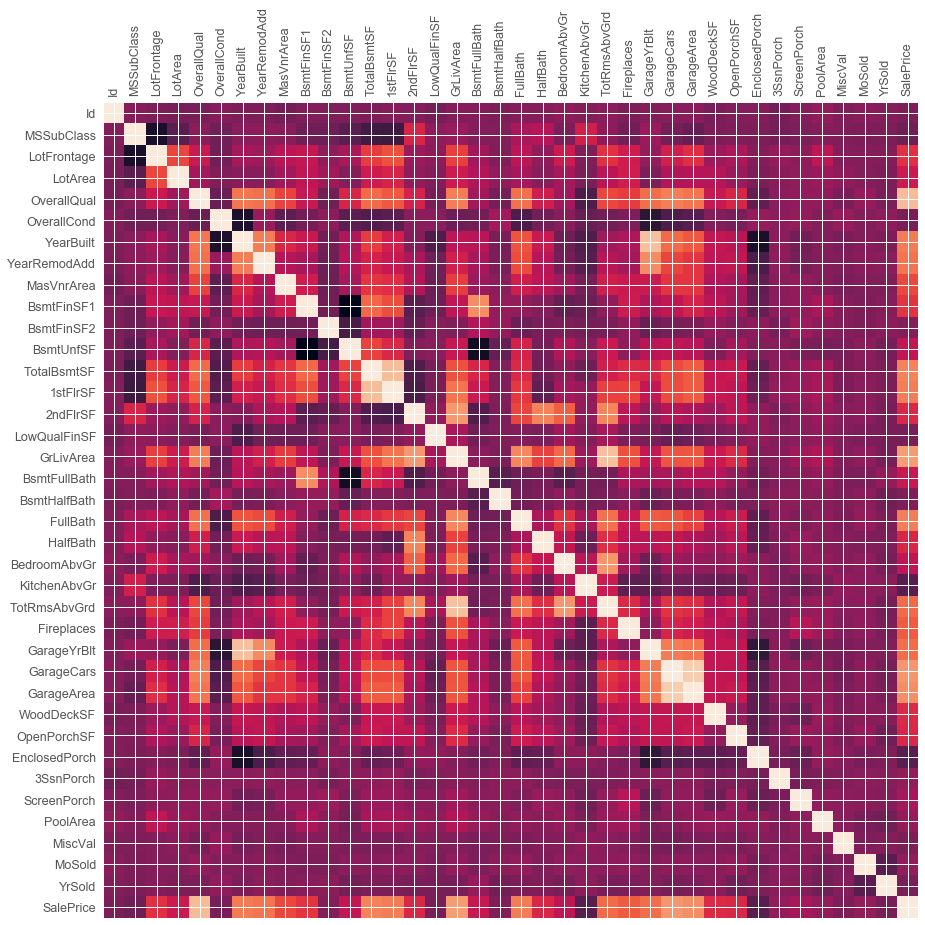

In [2071]:
corr = train_df.corr()
fix, ax = plt.subplots(figsize=(15,15))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);




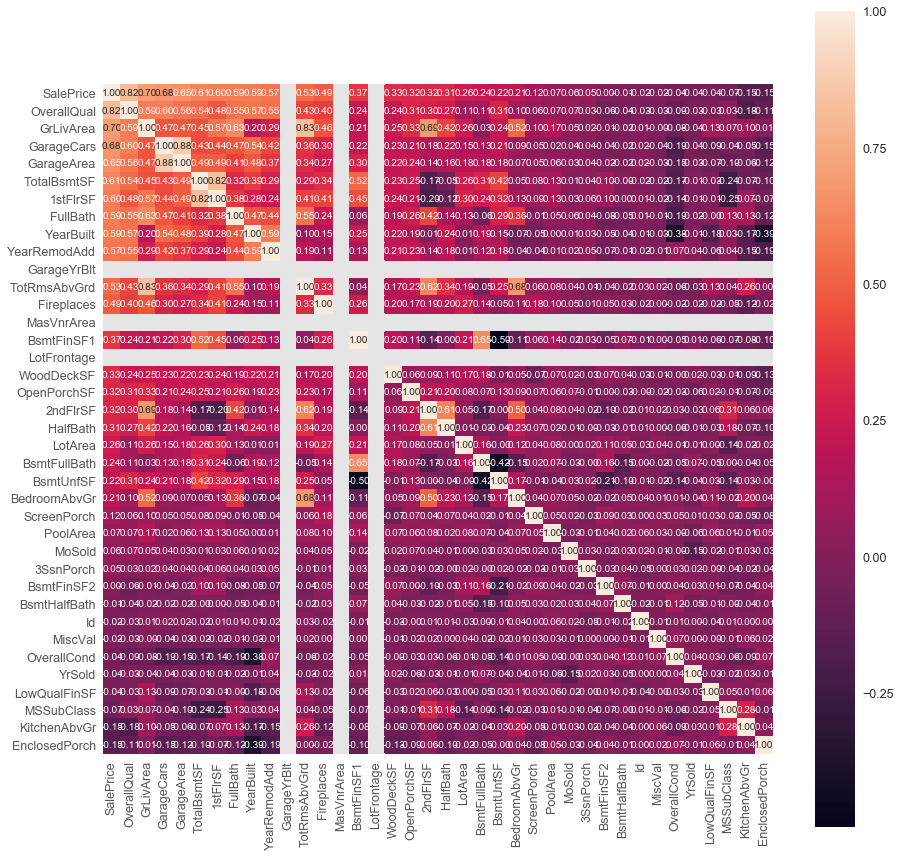

In [2072]:
#saleprice correlation matrix
fix, ax = plt.subplots(figsize=(15,15))

corrmat = train_df.corr()
k = 50#number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



# Features engineering- changing categorical ordered values to numbers

In [2136]:
all_data['LotShape']=all_data['LotShape'].replace(['IR3','IR2','IR1','Reg'],[0,0,0,1])

In [2137]:
all_data['Utilities']=all_data['Utilities'].replace(['NoSeWa','AllPub'],[0,1])

In [2138]:
all_data['LandSlope']=all_data['LandSlope'].replace(['Sev','Mod','Gtl'],[0,0,1])

In [2139]:
all_data['ExterQual']=all_data['ExterQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [2140]:
all_data['ExterCond']=all_data['ExterCond'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [2141]:
all_data['BsmtQual']=all_data['BsmtQual'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [2142]:
all_data['BsmtCond']=all_data['BsmtCond'].replace(['NoBasement','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [2143]:
all_data["BsmtExposure"]=all_data['BsmtExposure'].replace(['NoBasement','No','Mn','Av','Gd'],[0,1,2,3,4])

In [2144]:
all_data['BsmtFinType1']=all_data['BsmtFinType1'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [2145]:
all_data['BsmtFinType2']=all_data['BsmtFinType2'].replace(['NoBasement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[0,1,2,3,4,5,6])

In [2146]:
all_data['HeatingQC']=all_data['HeatingQC'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [2147]:
all_data['CentralAir']=all_data['CentralAir'].replace(['N','Y'],[0,1])

In [2148]:
all_data['Electrical']=all_data['Electrical'].replace(['FuseP','FuseF','FuseA','Mix','SBrkr'],[0,1,2,3,4])

In [2149]:
all_data['KitchenQual']=all_data['KitchenQual'].replace(['Po','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [2150]:
all_data['Functional']=all_data['Functional'].replace(['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],[0,1,2,3,4,5,6,7])

In [2151]:
all_data['FireplaceQu']=all_data['FireplaceQu'].replace(['NoFireplace','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [2152]:
all_data['GarageQual']=all_data['GarageQual'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [2153]:
all_data['GarageCond']=all_data['GarageCond'].replace(['NoGarage','Po','Fa','TA','Gd','Ex'],[0,1,2,3,4,5])

In [2154]:
all_data['PoolQC']=all_data['PoolQC'].replace(['NoPool','Fa','TA','Gd','Ex'],[0,1,2,3,4])

In [2155]:
all_data['GarageFinish']=all_data['GarageFinish'].replace(['NoGarage','Unf','RFn','Fin'],[0,1,2,3])

In [2156]:
all_data["MSZoning"]=all_data['MSZoning'].replace(['C (all)','RM','RH','RL','FV'],[0,1,1,2,3])

In [2157]:
all_data["LotConfig"]=all_data['LotConfig'].replace(['Inside','FR2','Corner','CulDSac','FR3'],[0,0,0,1,1])

In [2158]:
all_data["MasVnrType"]=all_data['MasVnrType'].replace(['BrkCmn','None','BrkFace','Stone'],[0,0,1,1])

In [2159]:
all_data['PavedDrive']=all_data['PavedDrive'].replace(['N','P','Y'],[0,1,2])

In [2160]:
all_data.shape

(2919, 79)

# Creating House Age Column and TotalSF, changing MSSubClass to Str

In [2161]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [2162]:
all_data['HouseAge'] = all_data['YearBuilt'].max() - all_data['YearBuilt']

In [2163]:
all_data['MSSubClass']=all_data['MSSubClass'].astype(str) #coverting MSSubClass to string 

In [2164]:
all_data.shape

(2919, 81)

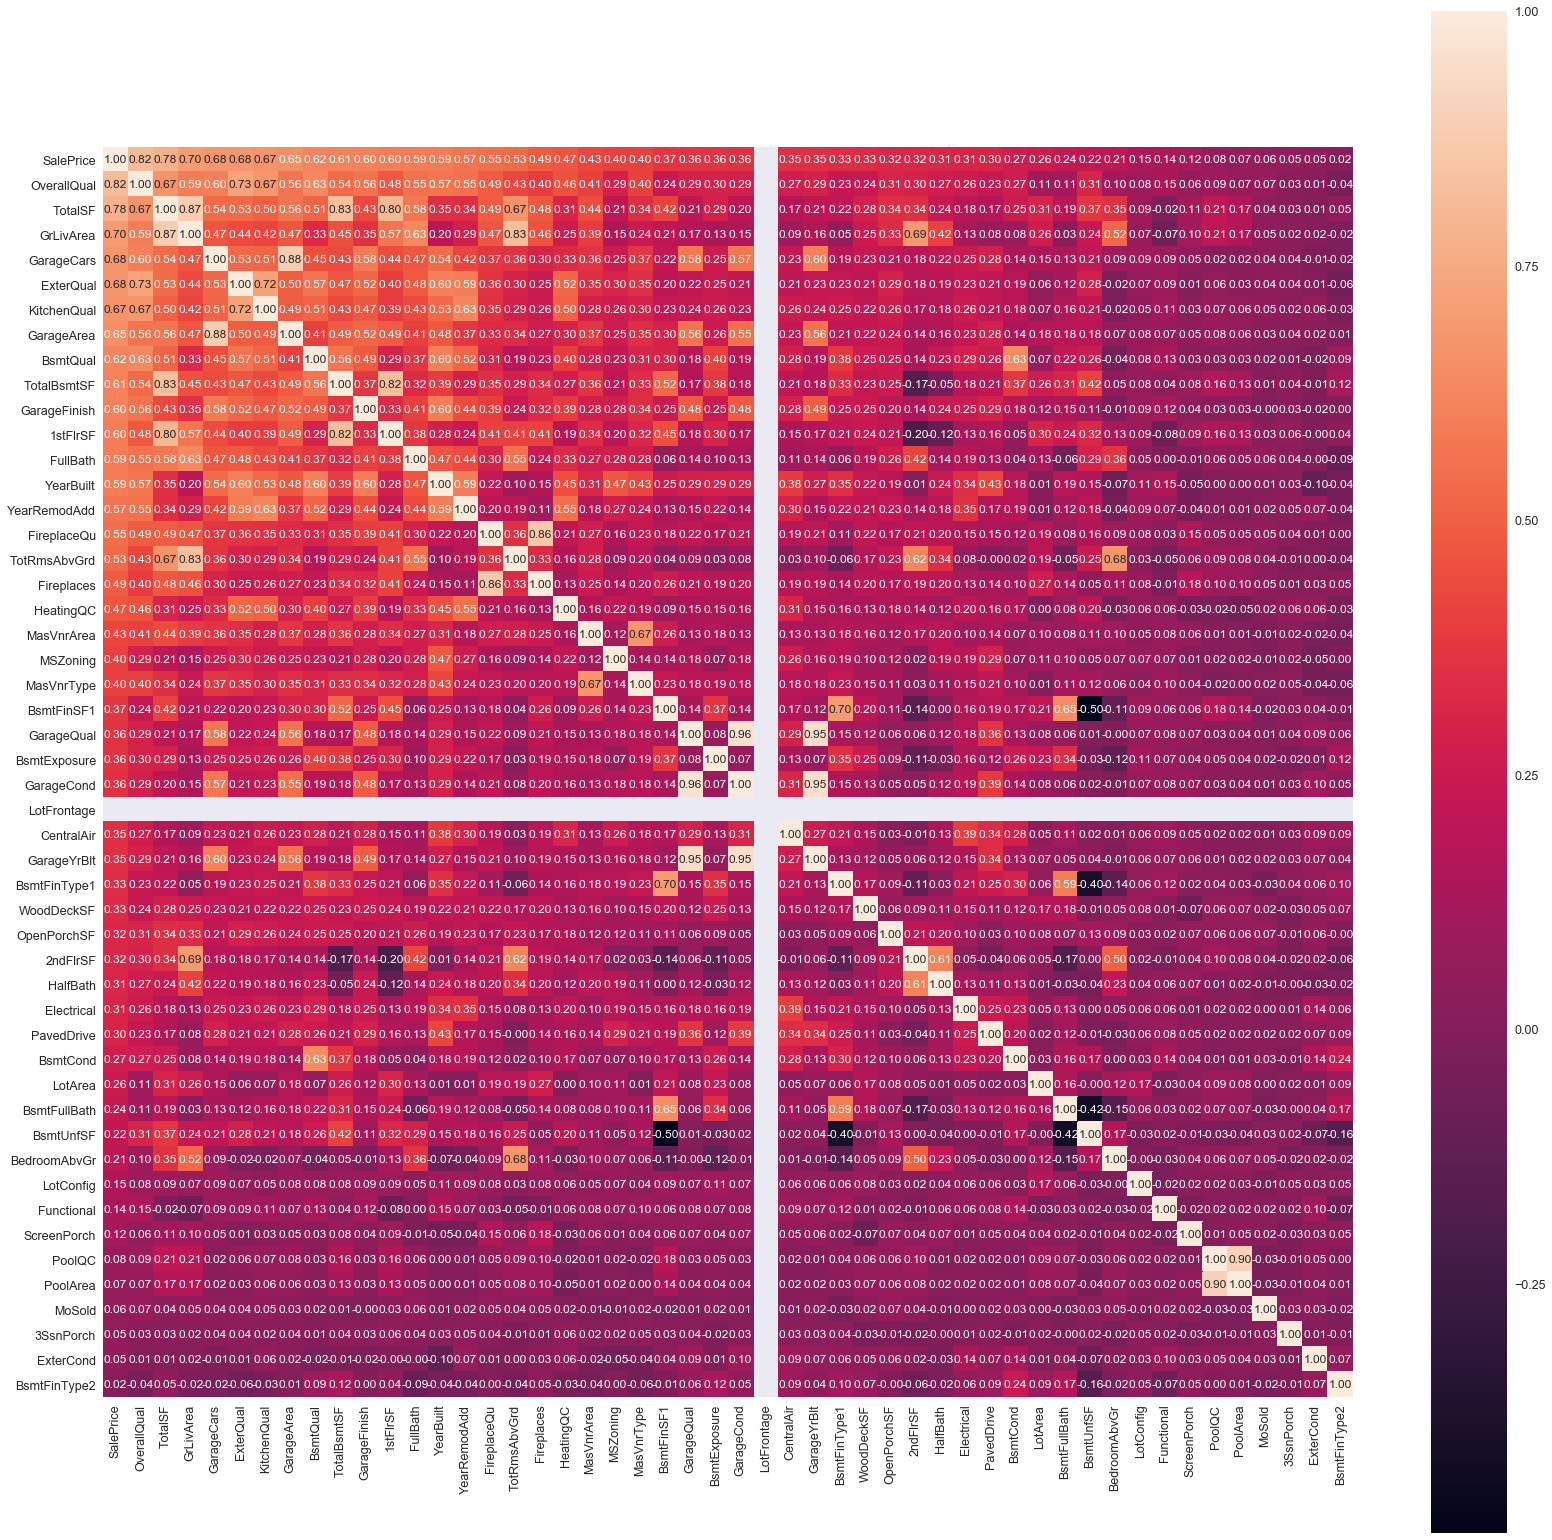

In [1725]:
#saleprice correlation matrix
fix, ax = plt.subplots(figsize=(28,28))

corrmat = train_df.corr()
k = 50#number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [1726]:
def correlation_rubric(cor_threshold):
#cor_threashold is numeric
#returns features that have a correlation greater than cor_threashold
    colnames = list(corrmat)
    x= []
    for colname in colnames:
        x.append(corrmat.loc[corrmat[colname] > cor_threshold].index.values)
    x_df = pd.DataFrame(x)
    
    x_df['index'] = colnames
    x_df.set_index('index', inplace=True)
    y = []
    for colname in colnames:
        y.append(train_df['SalePrice'].corr(train_df[colname]))
    x_df['SalePrice Correlation'] = y
    return x_df

In [1727]:
correlation_rubric(.65)

0             1             2            3  \
index                                                                   
Id                        Id          None          None         None   
MSZoning            MSZoning          None          None         None   
LotFrontage      LotFrontage          None          None         None   
LotArea              LotArea          None          None         None   
LotShape            LotShape          None          None         None   
Utilities          Utilities          None          None         None   
LotConfig          LotConfig          None          None         None   
LandSlope          LandSlope          None          None         None   
OverallQual      OverallQual     ExterQual   KitchenQual    SalePrice   
OverallCond      OverallCond          None          None         None   
YearBuilt          YearBuilt          None          None         None   
YearRemodAdd    YearRemodAdd          None          None         None   
MasVnrType        MasVnrType    MasVnrArea          None         None   
MasVnrArea        MasVnrType    MasVnrArea          None         None   
ExterQual        OverallQual     ExterQual   KitchenQual    SalePrice   
ExterCond          ExterCond          None          None         None   
BsmtQual            BsmtQual          None          None         None   
BsmtCond            BsmtCond          None          None         None   
BsmtExposure    BsmtExposure          None          None         None   
BsmtFinType1    BsmtFinType1    BsmtFinSF1          None         None   
BsmtFinSF1      BsmtFinType1    BsmtFinSF1          None         None   
BsmtFinType2    BsmtFinType2    BsmtFinSF2          None         None   
BsmtFinSF2      BsmtFinType2    BsmtFinSF2          None         None   
BsmtUnfSF          BsmtUnfSF          None          None         None   
TotalBsmtSF      TotalBsmtSF      1stFlrSF       TotalSF         None   
HeatingQC          HeatingQC          None          None         None   
CentralAir        CentralAir          None          None         None   
Electrical        Electrical          None          None         None   
1stFlrSF         TotalBsmtSF      1stFlrSF       TotalSF         None   
2ndFlrSF            2ndFlrSF     GrLivArea          None         None   
...                      ...           ...           ...          ...   
BsmtHalfBath    BsmtHalfBath          None          None         None   
FullBath            FullBath          None          None         None   
HalfBath            HalfBath          None          None         None   
BedroomAbvGr    BedroomAbvGr  TotRmsAbvGrd          None         None   
KitchenAbvGr    KitchenAbvGr          None          None         None   
KitchenQual      OverallQual     ExterQual   KitchenQual    SalePrice   
TotRmsAbvGrd       GrLivArea  BedroomAbvGr  TotRmsAbvGrd      TotalSF   
Functional        Functional          None          None         None   
Fireplaces        Fireplaces   FireplaceQu          None         None   
FireplaceQu       Fireplaces   FireplaceQu          None         None   
GarageYrBlt      GarageYrBlt    GarageQual    GarageCond         None   
GarageFinish    GarageFinish          None          None         None   
GarageCars        GarageCars    GarageArea     SalePrice         None   
GarageArea        GarageCars    GarageArea     SalePrice         None   
GarageQual       GarageYrBlt    GarageQual    GarageCond         None   
GarageCond       GarageYrBlt    GarageQual    GarageCond         None   
PavedDrive        PavedDrive          None          None         None   
WoodDeckSF        WoodDeckSF          None          None         None   
OpenPorchSF      OpenPorchSF          None          None         None   
EnclosedPorch  EnclosedPorch          None          None         None   
3SsnPorch          3SsnPorch          None          None         None   
ScreenPorch      ScreenPorch          None          None         None   
PoolArea    

# skew 2

In [2165]:
#creatin a df for normalizing features
alldata_normalized = all_data.copy()

In [2166]:
drop_cols = ['Utilities','ExterCond','BsmtFinType1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','Fireplaces','GarageYrBlt','GarageCond','3SsnPorch','PoolQC','MiscVal','MoSold','YrSold','YearBuilt']

In [2543]:
len(drop_cols)

21

In [2167]:
alldata_normalized.drop(drop_cols, axis=1, inplace=True)

In [2168]:
alldata_normalized.shape

(2919, 60)

In [2169]:
alldata_normalized.columns[alldata_normalized.isnull().any()].tolist()


['LotFrontage']

In [2170]:
numeric_feats = alldata_normalized.dtypes[alldata_normalized.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = alldata_normalized[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
PoolArea       16.898328
LotArea        12.822431
KitchenAbvGr    4.302254
EnclosedPorch   4.003891
ScreenPorch     3.946694
LotConfig       3.526015
MasVnrArea      2.674332
OpenPorchSF     2.535114
WoodDeckSF      1.842433
TotalSF         1.511479
LotFrontage     1.502351
BsmtFinSF1      1.425230
BsmtExposure    1.101307
BsmtUnfSF       0.919339
ExterQual       0.786382
TotRmsAbvGrd    0.758367
HalfBath        0.694566
BsmtFullBath    0.624832
HouseAge        0.599806
OverallCond     0.570312
MasVnrType      0.439866
KitchenQual     0.438535
GarageArea      0.239257
OverallQual     0.197110
FullBath        0.167606
GarageFinish    0.120309
FireplaceQu     0.112008
GarageCars     -0.219581
YearRemodAdd   -0.451020
HeatingQC      -0.549910
LotShape       -0.569186
MSZoning       -0.826428
BsmtQual       -1.286747
PavedDrive     -2.979084
GarageQual     -3.224563
Electrical     -3.287942
CentralAir     -3.459022
BsmtCond       -3.696503
LandSlope      -4.213417
Functional     -4.963567

In [1733]:
#skewness.to_csv('skewness2.csv')

In [2171]:
skewness = skewness[(skewness) > 0.75] #threshold for skewness is 0.75
print("There are {} skewed numerical features to transform".format(skewness.shape[0]))


There are 40 skewed numerical features to transform


In [2172]:
skewness = skewness.index


In [2221]:
skewness

Index(['PoolArea', 'LotArea', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch',
       'LotConfig', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'TotalSF',
       'BsmtFinSF1', 'BsmtExposure', 'BsmtUnfSF', 'ExterQual', 'TotRmsAbvGrd',
       'HalfBath', 'BsmtFullBath', 'HouseAge', 'OverallCond', 'MasVnrType',
       'KitchenQual', 'GarageArea', 'OverallQual', 'FullBath', 'GarageFinish',
       'FireplaceQu', 'GarageCars', 'YearRemodAdd', 'HeatingQC', 'LotShape',
       'MSZoning', 'BsmtQual', 'PavedDrive', 'GarageQual', 'Electrical',
       'CentralAir', 'BsmtCond', 'LandSlope', 'Functional'],
      dtype='object')

In [2174]:
skewness=skewness[skewness!='MSSubClass']
skewness=skewness[skewness!='Id']
skewness=skewness[skewness!='LotFrontage']

In [2175]:
alldata_normalized[skewness] = np.log1p(alldata_normalized[skewness])

In [2176]:
alldata_normalized

MSSubClass  MSZoning  LotFrontage    LotArea Street    Alley  LotShape  \
0            60  1.098612         65.0   9.042040   Pave  NoAlley  0.693147   
1            20  1.098612         80.0   9.169623   Pave  NoAlley  0.693147   
2            60  1.098612         68.0   9.328212   Pave  NoAlley  0.000000   
3            70  1.098612         60.0   9.164401   Pave  NoAlley  0.000000   
4            60  1.098612         84.0   9.565284   Pave  NoAlley  0.000000   
5            50  1.098612         85.0   9.555064   Pave  NoAlley  0.000000   
6            20  1.098612         75.0   9.218804   Pave  NoAlley  0.693147   
7            60  1.098612          NaN   9.247925   Pave  NoAlley  0.000000   
8            50  0.693147         51.0   8.719481   Pave  NoAlley  0.693147   
9           190  1.098612         50.0   8.912069   Pave  NoAlley  0.693147   
10           20  1.098612         70.0   9.323758   Pave  NoAlley  0.693147   
11           60  1.098612         85.0   9.386392   Pave  NoAlley  0.000000   
12           20  1.098612          NaN   9.470317   Pave  NoAlley  0.000000   
13           20  1.098612         91.0   9.273597   Pave  NoAlley  0.000000   
14           20  1.098612          NaN   9.298443   Pave  NoAlley  0.000000   
15           45  0.693147         51.0   8.719481   Pave  NoAlley  0.693147   
16           20  1.098612          NaN   9.327412   Pave  NoAlley  0.000000   
17           90  1.098612         72.0   9.286560   Pave  NoAlley  0.693147   
18           20  1.098612         66.0   9.524859   Pave  NoAlley  0.693147   
19           20  1.098612         70.0   8.930759   Pave  NoAlley  0.693147   
20           60  1.098612        101.0   9.562123   Pave  NoAlley  0.000000   
21           45  0.693147         57.0   8.915969   Pave     Grvl  0.693147   
22           20  1.098612         75.0   9.184304   Pave  NoAlley  0.693147   
23          120  0.693147         44.0   8.348775   Pave  NoAlley  0.693147   
24           20  1.098612          NaN   9.017605   Pave  NoAlley  0.000000   
25           20  1.098612        110.0   9.563178   Pave  NoAlley  0.693147   
26           20  1.098612         60.0   8.881975   Pave  NoAlley  0.693147   
27           20  1.098612         98.0   9.348275   Pave  NoAlley  0.693147   
28           20  1.098612         47.0   9.700269   Pave  NoAlley  0.000000   
29           30  0.693147         60.0   8.752265   Pave  NoAlley  0.000000   
...         ...       ...          ...        ...    ...      ...       ...   
1429         30  0.693147         50.0   8.858084   Pave  NoAlley  0.693147   
1430         50  0.693147         75.0   9.111735   Pave  NoAlley  0.693147   
1431         30  0.000000         69.0   9.422787   Pave  NoAlley  0.693147   
1432        190  0.000000         50.0   9.105091   Pave     Grvl  0.693147   
1433         50  0.000000         60.0   9.050289   Grvl  NoAlley  0.693147   
1434        120  0.693147         41.0   8.656781   Pave  NoAlley  0.000000   
1435        120  0.693147         44.0   8.254009   Pave  NoAlley  0.000000   
1436         20  1.098612         69.0  10.068197   Pave  NoAlley  0.000000   
1437         90  1.098612         65.0   9.034319   Pave  NoAlley  0.693147   
1438         20  1.098612         70.0   9.117896   Pave  NoAlley  0.693147   
1439         80  1.098612        140.0   9.312987   Pave  NoAlley  0.693147   
1440         20  1.098612          NaN  10.821836   Pave  NoAlley  0.000000   
1441         20  1.098612          NaN   8.999496   Pave  NoAlley  0.000000   
1442         20  1.098612         95.0   9.519221   Pave  NoAlley  0.693147   
1443         20  1.098612         88.0   9.356862   Pave  NoAlley  0.693147   
1444         20  1.098612        125.0  10.349807   Pave  NoAlley  0.693147   
1445         90  0.693147         78.0   8.856661   Pave  NoAlley  0.693147   
1446        160  0.693147         41.0   7.888335   Pave  NoAlley  0.693147   
1447         20  1.098612         58.0   9.227492   Pav

# Dummifying Categorical Data

In [2177]:
alldata_normalized_dummies = alldata_normalized.copy()

In [2178]:
alldata_normalized_dummies=pd.get_dummies(alldata_normalized_dummies, prefix = None, prefix_sep='_', dummy_na = False, columns=['MSSubClass','Street','Alley','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','Fence','MiscFeature','SaleType','SaleCondition'],sparse = False, drop_first=True)



In [2179]:
#shape of DF after dummifying 
alldata_normalized_dummies.shape

(2919, 189)

In [2180]:
pd.DataFrame(alldata_normalized_dummies.dtypes).loc['MasVnrType']

0    float64
Name: MasVnrType, dtype: object

In [2181]:
alldata_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612         65.0   9.042040  0.693147   0.000000   0.693147   
1     1.098612         80.0   9.169623  0.693147   0.000000   0.693147   
2     1.098612         68.0   9.328212  0.000000   0.000000   0.693147   
3     1.098612         60.0   9.164401  0.000000   0.000000   0.693147   
4     1.098612         84.0   9.565284  0.000000   0.000000   0.693147   
5     1.098612         85.0   9.555064  0.000000   0.000000   0.693147   
6     1.098612         75.0   9.218804  0.693147   0.000000   0.693147   
7     1.098612          NaN   9.247925  0.000000   0.000000   0.693147   
8     0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
9     1.098612         50.0   8.912069  0.693147   0.000000   0.693147   
10    1.098612         70.0   9.323758  0.693147   0.000000   0.693147   
11    1.098612         85.0   9.386392  0.000000   0.000000   0.693147   
12    1.098612          NaN   9.470317  0.000000   0.000000   0.693147   
13    1.098612         91.0   9.273597  0.000000   0.000000   0.693147   
14    1.098612          NaN   9.298443  0.000000   0.000000   0.693147   
15    0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
16    1.098612          NaN   9.327412  0.000000   0.693147   0.693147   
17    1.098612         72.0   9.286560  0.693147   0.000000   0.693147   
18    1.098612         66.0   9.524859  0.693147   0.000000   0.693147   
19    1.098612         70.0   8.930759  0.693147   0.000000   0.693147   
20    1.098612        101.0   9.562123  0.000000   0.000000   0.693147   
21    0.693147         57.0   8.915969  0.693147   0.000000   0.693147   
22    1.098612         75.0   9.184304  0.693147   0.000000   0.693147   
23    0.693147         44.0   8.348775  0.693147   0.000000   0.693147   
24    1.098612          NaN   9.017605  0.000000   0.000000   0.693147   
25    1.098612        110.0   9.563178  0.693147   0.000000   0.693147   
26    1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
27    1.098612         98.0   9.348275  0.693147   0.000000   0.693147   
28    1.098612         47.0   9.700269  0.000000   0.693147   0.693147   
29    0.693147         60.0   8.752265  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1429  0.693147         50.0   8.858084  0.693147   0.000000   0.693147   
1430  0.693147         75.0   9.111735  0.693147   0.000000   0.693147   
1431  0.000000         69.0   9.422787  0.693147   0.000000   0.693147   
1432  0.000000         50.0   9.105091  0.693147   0.000000   0.693147   
1433  0.000000         60.0   9.050289  0.693147   0.000000   0.693147   
1434  0.693147         41.0   8.656781  0.000000   0.000000   0.000000   
1435  0.693147         44.0   8.254009  0.000000   0.000000   0.000000   
1436  1.098612         69.0  10.068197  0.000000   0.000000   0.000000   
1437  1.098612         65.0   9.034319  0.693147   0.000000   0.693147   
1438  1.098612         70.0   9.117896  0.693147   0.000000   0.693147   
1439  1.098612        140.0   9.312987  0.693147   0.000000   0.693147   
1440  1.098612          NaN  10.821836  0.000000   0.000000   0.000000   
1441  1.098612          NaN   8.999496  0.000000   0.000000   0.693147   
1442  1.098612         95.0   9.519221  0.693147   0.000000   0.693147   
1443  1.098612         88.0   9.356862  0.693147   0.000000   0.693147   
1444  1.098612        125.0  10.349807  0.693147   0.000000   0.693147   
1445  0.693147         78.0   8.856661  0.693147   0.000000   0.693147   
1446  0.693147         41.0   7.888335  0.693147   0.000000   0.693147   
1447  1.098612         58.0   9.227492  0.000000   0.000000   0.693147   
1448  1.098612          NaN   9.378985  0.000000   0.000000   0.693147   
1449  0.693147         21.0   7.293698  0.693147   0.000000   0.693147   
1450  0.693147         21.0   7.303170  0.693147   0.000000   0.693147   
1451  1.09

# kNN for missing values - move this to before skewness 


In [2182]:
test_knn_LotFrontage = alldata_normalized_dummies[alldata_normalized_dummies.LotFrontage.isnull()] #where LotFrontage is NA
test_knn_LotFrontage

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
7     1.098612          NaN   9.247925  0.000000   0.000000   0.693147   
12    1.098612          NaN   9.470317  0.000000   0.000000   0.693147   
14    1.098612          NaN   9.298443  0.000000   0.000000   0.693147   
16    1.098612          NaN   9.327412  0.000000   0.693147   0.693147   
24    1.098612          NaN   9.017605  0.000000   0.000000   0.693147   
31    1.098612          NaN   9.053102  0.000000   0.693147   0.693147   
42    1.098612          NaN   9.124891  0.000000   0.693147   0.693147   
43    1.098612          NaN   9.127067  0.000000   0.693147   0.693147   
50    1.098612          NaN   9.537484  0.000000   0.000000   0.693147   
64    1.098612          NaN   9.145909  0.693147   0.000000   0.693147   
66    1.098612          NaN   9.898525  0.693147   0.000000   0.693147   
76    1.098612          NaN   9.044994  0.000000   0.000000   0.693147   
84    1.098612          NaN   9.051462  0.000000   0.000000   0.693147   
95    1.098612          NaN   9.186662  0.000000   0.000000   0.693147   
100   1.098612          NaN   9.268987  0.000000   0.000000   0.693147   
104   0.693147          NaN   8.956609  0.693147   0.000000   0.693147   
111   1.098612          NaN   8.955577  0.000000   0.000000   0.693147   
113   1.098612          NaN   9.952325  0.693147   0.000000   0.693147   
116   1.098612          NaN   9.360225  0.693147   0.000000   0.693147   
120   1.098612          NaN   9.973666  0.000000   0.693147   0.000000   
126   1.098612          NaN   8.502891  0.000000   0.000000   0.693147   
131   1.098612          NaN   9.411238  0.000000   0.000000   0.693147   
133   1.098612          NaN   8.832588  0.000000   0.000000   0.693147   
136   1.098612          NaN   9.245321  0.000000   0.000000   0.693147   
147   1.098612          NaN   9.159678  0.000000   0.693147   0.693147   
149   0.693147          NaN   8.738896  0.693147   0.000000   0.693147   
152   1.098612          NaN   9.602653  0.000000   0.693147   0.693147   
153   1.098612          NaN   9.510519  0.693147   0.000000   0.693147   
160   1.098612          NaN   9.316590  0.000000   0.693147   0.693147   
166   1.098612          NaN   9.278840  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1224  1.098612          NaN   9.440340  0.000000   0.000000   0.693147   
1240  1.098612          NaN   9.107200  0.000000   0.000000   0.693147   
1243  1.098612          NaN   9.131405  0.000000   0.000000   0.693147   
1244  1.098612          NaN   9.138737  0.000000   0.693147   0.693147   
1246  1.098612          NaN   9.064042  0.000000   0.000000   0.693147   
1247  1.098612          NaN   9.476773  0.000000   0.693147   0.693147   
1248  1.098612          NaN   8.989818  0.000000   0.000000   0.693147   
1249  1.098612          NaN   9.081370  0.000000   0.000000   0.693147   
1254  1.386294          NaN   8.006034  0.693147   0.000000   0.693147   
1255  1.386294          NaN   8.400210  0.000000   0.000000   0.693147   
1264  1.098612          NaN   9.186048  0.000000   0.000000   0.693147   
1267  1.098612          NaN   9.246576  0.000000   0.693147   0.693147   
1277  1.098612          NaN   9.095827  0.000000   0.000000   0.693147   
1278  1.098612          NaN   9.449436  0.000000   0.000000   0.693147   
1281  1.098612          NaN   9.170664  0.000000   0.000000   0.693147   
1304  1.098612          NaN   9.813344  0.000000   0.000000   0.693147   
1347  1.098612          NaN   9.335033  0.000000   0.000000   0.693147   
1350  1.098612          NaN   9.162829  0.000000   0.000000   0.693147   
1351  1.098612          NaN   8.878637  0.000000   0.693147   0.693147   
1352  1.098612          NaN   9.176059  0.000000   0.000000   0.693147   
1354  1.098612          NaN   9.771669  0.693147   0.000000   0.693147   
1355  1.098612          NaN   9.921131  0.693147   0.000000   0.000000   
1358  1.09

In [2183]:
#kNN for LotFrontage
train_knn_LotFrontage = alldata_normalized_dummies[-alldata_normalized_dummies.LotFrontage.isnull()]
train_knn_LotFrontage



MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612         65.0   9.042040  0.693147   0.000000   0.693147   
1     1.098612         80.0   9.169623  0.693147   0.000000   0.693147   
2     1.098612         68.0   9.328212  0.000000   0.000000   0.693147   
3     1.098612         60.0   9.164401  0.000000   0.000000   0.693147   
4     1.098612         84.0   9.565284  0.000000   0.000000   0.693147   
5     1.098612         85.0   9.555064  0.000000   0.000000   0.693147   
6     1.098612         75.0   9.218804  0.693147   0.000000   0.693147   
8     0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
9     1.098612         50.0   8.912069  0.693147   0.000000   0.693147   
10    1.098612         70.0   9.323758  0.693147   0.000000   0.693147   
11    1.098612         85.0   9.386392  0.000000   0.000000   0.693147   
13    1.098612         91.0   9.273597  0.000000   0.000000   0.693147   
15    0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
17    1.098612         72.0   9.286560  0.693147   0.000000   0.693147   
18    1.098612         66.0   9.524859  0.693147   0.000000   0.693147   
19    1.098612         70.0   8.930759  0.693147   0.000000   0.693147   
20    1.098612        101.0   9.562123  0.000000   0.000000   0.693147   
21    0.693147         57.0   8.915969  0.693147   0.000000   0.693147   
22    1.098612         75.0   9.184304  0.693147   0.000000   0.693147   
23    0.693147         44.0   8.348775  0.693147   0.000000   0.693147   
25    1.098612        110.0   9.563178  0.693147   0.000000   0.693147   
26    1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
27    1.098612         98.0   9.348275  0.693147   0.000000   0.693147   
28    1.098612         47.0   9.700269  0.000000   0.693147   0.693147   
29    0.693147         60.0   8.752265  0.000000   0.000000   0.693147   
30    0.000000         50.0   9.047939  0.693147   0.000000   0.693147   
32    1.098612         85.0   9.310186  0.693147   0.000000   0.693147   
33    1.098612         70.0   9.264165  0.000000   0.000000   0.693147   
34    1.098612         60.0   8.897546  0.693147   0.000000   0.693147   
35    1.098612        108.0   9.504427  0.693147   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1426  0.693147         50.0   8.894122  0.693147   0.000000   0.693147   
1427  0.693147         50.0   8.853808  0.693147   0.000000   0.693147   
1428  0.693147         61.0   9.051931  0.693147   0.000000   0.693147   
1429  0.693147         50.0   8.858084  0.693147   0.000000   0.693147   
1430  0.693147         75.0   9.111735  0.693147   0.000000   0.693147   
1431  0.000000         69.0   9.422787  0.693147   0.000000   0.693147   
1432  0.000000         50.0   9.105091  0.693147   0.000000   0.693147   
1433  0.000000         60.0   9.050289  0.693147   0.000000   0.693147   
1434  0.693147         41.0   8.656781  0.000000   0.000000   0.000000   
1435  0.693147         44.0   8.254009  0.000000   0.000000   0.000000   
1436  1.098612         69.0  10.068197  0.000000   0.000000   0.000000   
1437  1.098612         65.0   9.034319  0.693147   0.000000   0.693147   
1438  1.098612         70.0   9.117896  0.693147   0.000000   0.693147   
1439  1.098612        140.0   9.312987  0.693147   0.000000   0.693147   
1442  1.098612         95.0   9.519221  0.693147   0.000000   0.693147   
1443  1.098612         88.0   9.356862  0.693147   0.000000   0.693147   
1444  1.098612        125.0  10.349807  0.693147   0.000000   0.693147   
1445  0.693147         78.0   8.856661  0.693147   0.000000   0.693147   
1446  0.693147         41.0   7.888335  0.693147   0.000000   0.693147   
1447  1.098612         58.0   9.227492  0.000000   0.000000   0.693147   
1449  0.693147         21.0   7.293698  0.693147   0.000000   0.693147   
1450  0.693147         21.0   7.303170  0.693147   0.000000   0.693147   
1451  1.09

In [2184]:
y_col_for_knn=['LotFrontage']

In [2186]:
train_knn_LotFrontage[y_col_for_knn]

LotFrontage
0            65.0
1            80.0
2            68.0
3            60.0
4            84.0
5            85.0
6            75.0
8            51.0
9            50.0
10           70.0
11           85.0
13           91.0
15           51.0
17           72.0
18           66.0
19           70.0
20          101.0
21           57.0
22           75.0
23           44.0
25          110.0
26           60.0
27           98.0
28           47.0
29           60.0
30           50.0
32           85.0
33           70.0
34           60.0
35          108.0
...           ...
1426         50.0
1427         50.0
1428         61.0
1429         50.0
1430         75.0
1431         69.0
1432         50.0
1433         60.0
1434         41.0
1435         44.0
1436         69.0
1437         65.0
1438         70.0
1439        140.0
1442         95.0
1443         88.0
1444        125.0
1445         78.0
1446         41.0
1447         58.0
1449         21.0
1450         21.0
1451         80.0
1452         21.0
1453         21.0
1454         21.0
1455         21.0
1456        160.0
1457         62.0
1458         74.0

[2433 rows x 1 columns]

In [2187]:
test_knn_LotFrontage[y_col_for_knn]

LotFrontage
7             NaN
12            NaN
14            NaN
16            NaN
24            NaN
31            NaN
42            NaN
43            NaN
50            NaN
64            NaN
66            NaN
76            NaN
84            NaN
95            NaN
100           NaN
104           NaN
111           NaN
113           NaN
116           NaN
120           NaN
126           NaN
131           NaN
133           NaN
136           NaN
147           NaN
149           NaN
152           NaN
153           NaN
160           NaN
166           NaN
...           ...
1224          NaN
1240          NaN
1243          NaN
1244          NaN
1246          NaN
1247          NaN
1248          NaN
1249          NaN
1254          NaN
1255          NaN
1264          NaN
1267          NaN
1277          NaN
1278          NaN
1281          NaN
1304          NaN
1347          NaN
1350          NaN
1351          NaN
1352          NaN
1354          NaN
1355          NaN
1358          NaN
1379          NaN
1385          NaN
1387          NaN
1390          NaN
1440          NaN
1441          NaN
1448          NaN

[486 rows x 1 columns]

In [2188]:
x_col_knn = list(alldata_normalized_dummies.columns[alldata_normalized_dummies.dtypes != "object"])
x_col_knn

['MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'TotalSF',
 'HouseAge',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste

In [2189]:
#x_col_knn = x_col_knn[3:8] + x_col_knn[9:]
x_col_knn = x_col_knn[0:1] +  x_col_knn[2:]
len(x_col_knn)
x_col_knn

['MSZoning',
 'LotArea',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'TotalSF',
 'HouseAge',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'Street_Pave',
 'Alley_NoAlley',
 'Alley_Pave',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Neighborhood_Blueste',
 'Neighborhoo

In [2327]:
len(x_col_knn)

188

In [2190]:
#creating train test split 


y=train_knn_LotFrontage["LotFrontage"]
X_train, X_test, y_train, y_test = train_test_split(train_knn_LotFrontage, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1946, 189) (1946,)
(487, 189) (487,)


In [2191]:
X_train

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
178   1.098612         63.0   9.765604  0.000000   0.693147   0.693147   
258   1.098612         96.0   9.271341  0.000000   0.000000   0.693147   
585   1.098612         75.0   9.185125  0.693147   0.000000   0.693147   
972   1.098612         55.0   8.973732  0.693147   0.000000   0.693147   
1267  1.098612         89.0   9.489108  0.000000   0.000000   0.693147   
696   0.693147         50.0   8.699681  0.693147   0.000000   0.693147   
505   1.098612         24.0   7.835975  0.693147   0.000000   0.693147   
505   0.693147         60.0   8.935509  0.693147   0.000000   0.693147   
877   1.098612         74.0   9.086476  0.693147   0.000000   0.693147   
892   1.386294         85.0   9.271059  0.693147   0.000000   0.693147   
863   1.098612         70.0   8.978660  0.693147   0.000000   0.693147   
642   0.693147         69.0   9.120853  0.693147   0.000000   0.693147   
304   0.693147         87.0   9.819399  0.693147   0.000000   0.693147   
542   1.098612         73.0   9.190342  0.693147   0.000000   0.693147   
1403  1.098612         90.0   9.311181  0.000000   0.000000   0.693147   
828   1.098612        110.0   9.570390  0.693147   0.000000   0.693147   
165   1.098612         85.0   9.230241  0.693147   0.000000   0.693147   
790   1.098612         43.0   8.065579  0.693147   0.000000   0.693147   
365   0.693147         59.0   9.277158  0.693147   0.000000   0.693147   
296   1.098612         65.0   9.002824  0.693147   0.000000   0.693147   
823   0.693147         21.0   7.629976  0.693147   0.000000   0.693147   
312   0.693147         65.0   8.962007  0.693147   0.000000   0.693147   
656   1.098612         72.0   9.211140  0.000000   0.000000   0.693147   
36    1.098612        112.0   9.292842  0.693147   0.000000   0.693147   
1053  1.098612         68.0   9.055206  0.693147   0.000000   0.000000   
1068  0.693147         42.0   8.285261  0.693147   0.000000   0.693147   
718   1.098612         96.0   9.263217  0.693147   0.000000   0.693147   
1271  1.098612         68.0   9.182455  0.693147   0.000000   0.693147   
870   1.098612        100.0   9.408535  0.000000   0.000000   0.693147   
469   1.098612         76.0   9.136909  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
861   1.098612         75.0   9.360999  0.693147   0.000000   0.693147   
653   0.693147         60.0   9.241936  0.693147   0.000000   0.693147   
768   1.098612         70.0   9.116140  0.693147   0.000000   0.693147   
510   1.098612         75.0   9.586033  0.693147   0.000000   0.693147   
793   1.098612         76.0   9.122492  0.693147   0.000000   0.693147   
963   1.098612        122.0   9.386308  0.000000   0.000000   0.693147   
1437  1.098612         65.0   9.034319  0.693147   0.000000   0.693147   
956   1.098612         68.0   8.980046  0.693147   0.000000   0.693147   
118   1.098612         90.0   9.423595  0.693147   0.000000   0.693147   
804   1.098612        195.0  10.635879  0.000000   0.000000   0.693147   
998   0.693147         51.0   8.719481  0.693147   0.000000   0.693147   
910   1.098612         80.0   9.358847  0.693147   0.000000   0.693147   
1184  1.098612         50.0  10.466925  0.693147   0.000000   0.000000   
1143  0.693147         21.0   7.310550  0.693147   0.000000   0.693147   
879   1.098612         98.0   9.416704  0.000000   0.000000   0.693147   
1089  1.098612        128.0  10.578751  0.000000   0.000000   0.693147   
646   1.098612         60.0   8.881975  0.693147   0.000000   0.693147   
595   1.098612         80.0   9.169623  0.693147   0.000000   0.693147   
1214  1.098612         43.0   8.010028  0.693147   0.000000   0.693147   
1104  1.098612        126.0   9.481054  0.000000   0.000000   0.693147   
847   1.098612         36.0   9.650142  0.000000   0.693147   0.693147   
1382  1.098612         50.0   9.028938  0.000000   0.000000   0.693147   
751   0.69

In [2192]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1, 60)

# list of scores from k_range
k_scores = []

X=train_knn_LotFrontage[x_col_knn]
y=train_knn_LotFrontage[y_col_for_knn]
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(max(k_scores))



-392.136325374


In [2193]:
k_scores

[-538.71381636645754,
 -443.06597601700059,
 -425.68009099972267,
 -403.80833069807056,
 -399.13945038116441,
 -392.75661579789664,
 -392.13632537410831,
 -392.72193608539089,
 -394.66761416400766,
 -396.43542253592392,
 -398.99393454331369,
 -402.17053899205064,
 -402.27446970903605,
 -403.00617880272932,
 -406.20570480559485,
 -406.92983042347618,
 -410.47583675374028,
 -412.99117283013641,
 -415.8099544290215,
 -417.41215540460769,
 -419.07340965417626,
 -421.43034178303986,
 -421.80762556771032,
 -422.79781046557719,
 -424.80208097955875,
 -426.41103943445876,
 -428.34314413277406,
 -429.85207629664393,
 -430.92034924916226,
 -431.99731179023593,
 -433.68820688003279,
 -434.60641545167874,
 -436.57412005590061,
 -437.11240181868072,
 -438.14406561920458,
 -438.94405848060615,
 -439.63891896376265,
 -440.8021030021755,
 -442.39598077831232,
 -443.10616461116172,
 -443.52877275768407,
 -443.78775250908564,
 -444.66990884997506,
 -445.53795406927776,
 -446.68727003747097,
 -447.446424

Text(0,0.5,'neg_mean_squared_error')

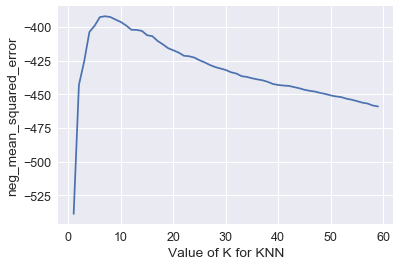

In [2194]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('neg_mean_squared_error')

In [2197]:
import random
random.seed(0)
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train[x_col_knn], y_train)
predictions = knn.predict(X_test[x_col_knn])



In [2198]:
actual = y_test
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
mse

346.91696098562596

In [2324]:
predictions_lotfrontage = knn.predict(test_knn_LotFrontage[x_col_knn])
alldata_normalized_dummies.loc[alldata_normalized_dummies["LotFrontage"].isnull(),"LotFrontage"] = predictions_lotfrontage

predictions_lotfrontage

ValueError: Must have equal len keys and value when setting with an iterable

In [2325]:
predictions_lotfrontage

array([  89.4,   83.4,   91.2,   87.2,   61.8,   74.8,   57. ,   64.2,
         69.2,   69.4,   82. ,   73.4,   68.6,   63.8,   81.8,   80.2,
         71.4,   90.2,   71.8,   68.6,   57.2,   63. ,   73.6,   75.2,
         80.8,   58.6,   80.6,   70. ,   57.6,   92. ,   88.8,   71.8,
         59.8,   22.2,   70.8,   72.2,   52.4,   75. ,   70.8,   78.2,
         90.2,   73.6,   73. ,   71.6,   68.4,   90. ,   77.4,   61.4,
         69. ,   70. ,   55.6,   65.4,   73.6,   95.8,   66. ,   66.8,
         79.2,   71. ,   82.4,   73.2,   60. ,   72.6,   68. ,   76.2,
         75.6,   88.8,   74.6,   80.4,   54.2,   76.6,   64.4,   59. ,
         69.8,   81.2,   70. ,   77.8,   66.2,   74.4,   74.8,   72.2,
         69.6,   75. ,   45. ,   55.8,   72. ,   76.4,   90.4,   86. ,
         64.8,   89.2,   67. ,   80.6,   52.4,   73.6,   76.8,   47. ,
         78.8,   71.4,   66.4,   90.4,   52.2,   77.6,   81.4,   79. ,
         65.4,   31.4,   71. ,   69.4,   75.8,   60.6,   77.2,   73.8,
      

In [2200]:
alldata_normalized_dummies["LotFrontage"] = np.log1p(alldata_normalized_dummies["LotFrontage"])

In [2201]:
alldata_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612     4.189655   9.042040  0.693147   0.000000   0.693147   
1     1.098612     4.394449   9.169623  0.693147   0.000000   0.693147   
2     1.098612     4.234107   9.328212  0.000000   0.000000   0.693147   
3     1.098612     4.110874   9.164401  0.000000   0.000000   0.693147   
4     1.098612     4.442651   9.565284  0.000000   0.000000   0.693147   
5     1.098612     4.454347   9.555064  0.000000   0.000000   0.693147   
6     1.098612     4.330733   9.218804  0.693147   0.000000   0.693147   
7     1.098612     4.504244   9.247925  0.000000   0.000000   0.693147   
8     0.693147     3.951244   8.719481  0.693147   0.000000   0.693147   
9     1.098612     3.931826   8.912069  0.693147   0.000000   0.693147   
10    1.098612     4.262680   9.323758  0.693147   0.000000   0.693147   
11    1.098612     4.454347   9.386392  0.000000   0.000000   0.693147   
12    1.098612     4.435567   9.470317  0.000000   0.000000   0.693147   
13    1.098612     4.521789   9.273597  0.000000   0.000000   0.693147   
14    1.098612     4.523960   9.298443  0.000000   0.000000   0.693147   
15    0.693147     3.951244   8.719481  0.693147   0.000000   0.693147   
16    1.098612     4.479607   9.327412  0.000000   0.693147   0.693147   
17    1.098612     4.290459   9.286560  0.693147   0.000000   0.693147   
18    1.098612     4.204693   9.524859  0.693147   0.000000   0.693147   
19    1.098612     4.262680   8.930759  0.693147   0.000000   0.693147   
20    1.098612     4.624973   9.562123  0.000000   0.000000   0.693147   
21    0.693147     4.060443   8.915969  0.693147   0.000000   0.693147   
22    1.098612     4.330733   9.184304  0.693147   0.000000   0.693147   
23    0.693147     3.806662   8.348775  0.693147   0.000000   0.693147   
24    1.098612     4.139955   9.017605  0.000000   0.000000   0.693147   
25    1.098612     4.709530   9.563178  0.693147   0.000000   0.693147   
26    1.098612     4.110874   8.881975  0.693147   0.000000   0.693147   
27    1.098612     4.595120   9.348275  0.693147   0.000000   0.693147   
28    1.098612     3.871201   9.700269  0.000000   0.693147   0.693147   
29    0.693147     4.110874   8.752265  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1429  0.693147     3.931826   8.858084  0.693147   0.000000   0.693147   
1430  0.693147     4.330733   9.111735  0.693147   0.000000   0.693147   
1431  0.000000     4.248495   9.422787  0.693147   0.000000   0.693147   
1432  0.000000     3.931826   9.105091  0.693147   0.000000   0.693147   
1433  0.000000     4.110874   9.050289  0.693147   0.000000   0.693147   
1434  0.693147     3.737670   8.656781  0.000000   0.000000   0.000000   
1435  0.693147     3.806662   8.254009  0.000000   0.000000   0.000000   
1436  1.098612     4.248495  10.068197  0.000000   0.000000   0.000000   
1437  1.098612     4.189655   9.034319  0.693147   0.000000   0.693147   
1438  1.098612     4.262680   9.117896  0.693147   0.000000   0.693147   
1439  1.098612     4.948760   9.312987  0.693147   0.000000   0.693147   
1440  1.098612     4.298645  10.821836  0.000000   0.000000   0.000000   
1441  1.098612     4.276666   8.999496  0.000000   0.000000   0.693147   
1442  1.098612     4.564348   9.519221  0.693147   0.000000   0.693147   
1443  1.098612     4.488636   9.356862  0.693147   0.000000   0.693147   
1444  1.098612     4.836282  10.349807  0.693147   0.000000   0.693147   
1445  0.693147     4.369448   8.856661  0.693147   0.000000   0.693147   
1446  0.693147     3.737670   7.888335  0.693147   0.000000   0.693147   
1447  1.098612     4.077537   9.227492  0.000000   0.000000   0.693147   
1448  1.098612     4.428433   9.378985  0.000000   0.000000   0.693147   
1449  0.693147     3.091042   7.293698  0.693147   0.000000   0.693147   
1450  0.693147     3.091042   7.303170  0.693147   0.000000   0.693147   
1451  1.09

# Splitting back out given Train and Test sets after cleaning/feature engineering

In [2224]:
#creating matrices for sklearn:
train_normalized_dummies = alldata_normalized_dummies[:train_df.shape[0]]
test_normalized_dummies = alldata_normalized_dummies[train_df.shape[0]:]
y = train_df.SalePrice

In [2225]:
train_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612     4.189655   9.042040  0.693147   0.000000   0.693147   
1     1.098612     4.394449   9.169623  0.693147   0.000000   0.693147   
2     1.098612     4.234107   9.328212  0.000000   0.000000   0.693147   
3     1.098612     4.110874   9.164401  0.000000   0.000000   0.693147   
4     1.098612     4.442651   9.565284  0.000000   0.000000   0.693147   
5     1.098612     4.454347   9.555064  0.000000   0.000000   0.693147   
6     1.098612     4.330733   9.218804  0.693147   0.000000   0.693147   
7     1.098612     4.504244   9.247925  0.000000   0.000000   0.693147   
8     0.693147     3.951244   8.719481  0.693147   0.000000   0.693147   
9     1.098612     3.931826   8.912069  0.693147   0.000000   0.693147   
10    1.098612     4.262680   9.323758  0.693147   0.000000   0.693147   
11    1.098612     4.454347   9.386392  0.000000   0.000000   0.693147   
12    1.098612     4.435567   9.470317  0.000000   0.000000   0.693147   
13    1.098612     4.521789   9.273597  0.000000   0.000000   0.693147   
14    1.098612     4.523960   9.298443  0.000000   0.000000   0.693147   
15    0.693147     3.951244   8.719481  0.693147   0.000000   0.693147   
16    1.098612     4.479607   9.327412  0.000000   0.693147   0.693147   
17    1.098612     4.290459   9.286560  0.693147   0.000000   0.693147   
18    1.098612     4.204693   9.524859  0.693147   0.000000   0.693147   
19    1.098612     4.262680   8.930759  0.693147   0.000000   0.693147   
20    1.098612     4.624973   9.562123  0.000000   0.000000   0.693147   
21    0.693147     4.060443   8.915969  0.693147   0.000000   0.693147   
22    1.098612     4.330733   9.184304  0.693147   0.000000   0.693147   
23    0.693147     3.806662   8.348775  0.693147   0.000000   0.693147   
24    1.098612     4.139955   9.017605  0.000000   0.000000   0.693147   
25    1.098612     4.709530   9.563178  0.693147   0.000000   0.693147   
26    1.098612     4.110874   8.881975  0.693147   0.000000   0.693147   
27    1.098612     4.595120   9.348275  0.693147   0.000000   0.693147   
28    1.098612     3.871201   9.700269  0.000000   0.693147   0.693147   
29    0.693147     4.110874   8.752265  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612     4.110874   9.995656  0.000000   0.000000   0.693147   
1431  1.098612     4.097672   8.502891  0.000000   0.000000   0.693147   
1432  1.098612     4.110874   9.287394  0.693147   0.000000   0.693147   
1433  1.098612     4.543295   9.236203  0.000000   0.000000   0.693147   
1434  1.098612     4.394449   9.764283  0.693147   0.000000   0.000000   
1435  1.098612     4.394449   9.036106  0.693147   0.000000   0.693147   
1436  1.098612     4.110874   9.105091  0.693147   0.000000   0.693147   
1437  1.098612     4.574711   9.429074  0.693147   0.000000   0.693147   
1438  0.693147     4.510860   8.910316  0.693147   0.000000   0.693147   
1439  1.098612     4.394449   9.357466  0.693147   0.000000   0.693147   
1440  1.098612     4.382027   9.352447  0.000000   0.000000   0.000000   
1441  0.693147     3.977811   8.395477  0.693147   0.000000   0.693147   
1442  1.386294     4.454347   9.306014  0.693147   0.000000   0.693147   
1443  1.098612     4.053523   9.088738  0.693147   0.000000   0.693147   
1444  1.098612     4.158883   9.047939  0.693147   0.000000   0.693147   
1445  1.098612     4.262680   9.036106  0.693147   0.000000   0.693147   
1446  1.098612     4.374498  10.171337  0.000000   0.693147   0.693147   
1447  1.098612     4.394449   9.210440  0.693147   0.000000   0.693147   
1448  1.098612     4.262680   9.373139  0.693147   0.000000   0.693147   
1449  0.693147     3.091042   7.335634  0.693147   0.000000   0.693147   
1450  1.098612     4.110874   9.105091  0.693147   0.000000   0.693147   
1451  1.098612     4.369448   9.133783  0.693147   0.000000   0.693147   
1452  0.69

In [2226]:
test_normalized_dummies

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     0.693147     4.394449   9.360741  0.693147   0.000000   0.693147   
1     1.098612     4.406719   9.565775  0.000000   0.000000   0.693147   
2     1.098612     4.317488   9.534668  0.000000   0.000000   0.693147   
3     1.098612     4.369448   9.208238  0.000000   0.000000   0.693147   
4     1.098612     3.784190   8.518392  0.000000   0.000000   0.693147   
5     1.098612     4.330733   9.210440  0.000000   0.000000   0.693147   
6     1.098612     4.409155   8.984819  0.000000   0.000000   0.693147   
7     1.098612     4.158883   9.036344  0.000000   0.000000   0.693147   
8     1.098612     4.454347   9.227886  0.693147   0.000000   0.693147   
9     1.098612     4.262680   9.036106  0.693147   0.000000   0.693147   
10    0.693147     3.295837   8.675734  0.000000   0.000000   0.693147   
11    0.693147     3.091042   7.427144  0.693147   0.000000   0.693147   
12    0.693147     3.091042   7.427144  0.693147   0.000000   0.693147   
13    1.098612     3.218876   7.732369  0.693147   0.000000   0.693147   
14    1.098612     3.218876   7.732369  0.693147   0.000000   0.693147   
15    1.098612     4.634729   9.461799  0.000000   0.000000   0.693147   
16    1.098612     4.553877   9.463742  0.000000   0.000000   0.693147   
17    1.098612     4.510860   9.351927  0.693147   0.000000   0.693147   
18    1.098612     4.382027   9.555560  0.000000   0.000000   0.693147   
19    1.098612     4.709530   9.568085  0.693147   0.000000   0.000000   
20    1.098612     4.663439   9.521568  0.693147   0.000000   0.693147   
21    1.098612     3.737670   8.872487  0.000000   0.000000   0.693147   
22    1.098612     4.615121   9.825256  0.000000   0.000000   0.693147   
23    1.098612     3.784190   8.072155  0.693147   0.000000   0.693147   
24    1.098612     4.219508   9.495594  0.000000   0.000000   0.693147   
25    1.098612     4.158883   9.056956  0.000000   0.000000   0.693147   
26    1.098612     4.110874   9.766178  0.000000   0.693147   0.693147   
27    1.098612     4.304065   9.103646  0.693147   0.000000   0.693147   
28    1.386294     4.532599   9.128696  0.693147   0.000000   0.693147   
29    1.386294     4.442651   9.253496  0.693147   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1429  0.693147     3.931826   8.858084  0.693147   0.000000   0.693147   
1430  0.693147     4.330733   9.111735  0.693147   0.000000   0.693147   
1431  0.000000     4.248495   9.422787  0.693147   0.000000   0.693147   
1432  0.000000     3.931826   9.105091  0.693147   0.000000   0.693147   
1433  0.000000     4.110874   9.050289  0.693147   0.000000   0.693147   
1434  0.693147     3.737670   8.656781  0.000000   0.000000   0.000000   
1435  0.693147     3.806662   8.254009  0.000000   0.000000   0.000000   
1436  1.098612     4.248495  10.068197  0.000000   0.000000   0.000000   
1437  1.098612     4.189655   9.034319  0.693147   0.000000   0.693147   
1438  1.098612     4.262680   9.117896  0.693147   0.000000   0.693147   
1439  1.098612     4.948760   9.312987  0.693147   0.000000   0.693147   
1440  1.098612     4.298645  10.821836  0.000000   0.000000   0.000000   
1441  1.098612     4.276666   8.999496  0.000000   0.000000   0.693147   
1442  1.098612     4.564348   9.519221  0.693147   0.000000   0.693147   
1443  1.098612     4.488636   9.356862  0.693147   0.000000   0.693147   
1444  1.098612     4.836282  10.349807  0.693147   0.000000   0.693147   
1445  0.693147     4.369448   8.856661  0.693147   0.000000   0.693147   
1446  0.693147     3.737670   7.888335  0.693147   0.000000   0.693147   
1447  1.098612     4.077537   9.227492  0.000000   0.000000   0.693147   
1448  1.098612     4.428433   9.378985  0.000000   0.000000   0.693147   
1449  0.693147     3.091042   7.293698  0.693147   0.000000   0.693147   
1450  0.693147     3.091042   7.303170  0.693147   0.000000   0.693147   
1451  1.09

# Outliers in TotalSF

In [2227]:
train_normalized_dummies.columns.get_loc("TotalSF")

38

In [2228]:
train_normalized_dummies.shape

(1460, 189)

In [2229]:
y.shape

(1460,)

In [2230]:
train_normalizedsales_dummies=pd.concat([train_normalized_dummies, y], axis=1)

Text(0,0.5,'SalePrice')

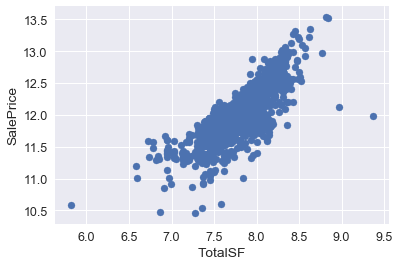

In [2231]:
#description text tells us there are outliers. specifically with sale price and GrLivArea 
#plot shows us 2 outliers on bottom right of scatterplot where GrLivArea is very large but sale price is extremely low
n = 38
plt.scatter(train_normalizedsales_dummies.iloc[:,n],train_normalizedsales_dummies['SalePrice'])
plt.xlabel(train_normalizedsales_dummies.columns[n])
plt.ylabel('SalePrice')

# DataFrame removing outliers

In [2232]:
train_outs=train_normalizedsales_dummies.copy()

In [2233]:
pd.set_option('display.max_columns', 500)
train_outs.loc[(train_outs['TotalSF'] > 8.8)]
#1st and 4th one 

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
523   1.098612     4.875197  10.599007       0.0        0.0   0.693147   
691   1.098612     4.653960   9.977481       0.0        0.0   0.693147   
1182  1.098612     5.081404   9.656563       0.0        0.0   0.693147   
1298  1.098612     5.749393  11.064887       0.0        0.0   0.693147   

      OverallQual  OverallCond  YearRemodAdd  MasVnrType  MasVnrArea  \
523      2.397895     1.791759      7.605392    0.693147    6.637258   
691      2.397895     1.945910      7.598900    0.693147    7.065613   
1182     2.397895     1.791759      7.599401    0.000000    0.000000   
1298     2.397895     1.791759      7.605392    0.693147    6.680855   

      ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
523    1.609438  1.791759  1.386294      1.609438    7.723562   6.778785   
691    1.609438  1.791759  1.386294      1.609438    7.283448   6.897705   
1182   1.386294  1.791759  1.386294      1.386294    7.648263   5.707110   
1298   1.609438  1.791759  1.386294      1.609438    8.638525   6.146329   

      HeatingQC  CentralAir  Electrical  BsmtFullBath  FullBath  HalfBath  \
523    1.609438    0.693147    1.609438      0.693147  1.386294  0.693147   
691    1.609438    0.693147    1.609438      0.000000  1.386294  0.693147   
1182   1.609438    0.693147    1.609438      0.693147  1.386294  0.693147   
1298   1.609438    0.693147    1.609438      1.098612  1.098612  0.693147   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  FireplaceQu  \
523       0.693147     1.609438      2.484907    2.079442     1.609438   
691       0.693147     1.609438      2.397895    2.079442     1.791759   
1182      0.693147     1.609438      2.397895    2.079442     1.386294   
1298      0.693147     1.609438      2.564949    2.079442     1.609438   

      GarageFinish  GarageCars  GarageArea  GarageQual  PavedDrive  \
523       1.386294    1.386294    6.785588    1.386294    1.098612   
691       1.386294    1.386294    6.725034    1.386294    1.098612   
1182      1.386294    1.386294    6.701960    1.386294    1.098612   
1298      1.386294    1.098612    7.257708    1.386294    1.098612   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  PoolArea   TotalSF  \
523     5.342334     6.008813            0.0          0.0  0.000000  8.963800   
691     5.948035     3.931826            0.0          0.0  0.000000  8.818926   
1182    5.147494     4.369448            0.0          0.0  6.320768  8.835356   
1298    5.370638     5.680173            0.0          0.0  6.175867  9.371864   

      HouseAge  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
523   1.386294               0               0               0   
691   2.833213               0               0               0   
1182  2.708050               0               0               0   
1298  1.098612               0               0               0   

      MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  \
523                0              0              0              0   
691                0              0              0              0   
1182               0              0              0              0   
1298               0              0              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
523               0              0              1              0   
691               0              0              1              0   
1182              0              0              1              0   
1298              0              0              1              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  Street_Pave  \
523               0              0              0              0            1   
691               0              0              0              0            1   
1182              0              0              0              0            1   
1298              0              0   

In [2234]:
train_outs2=train_outs[train_outs.index != 1298]
train_outs3=train_outs2[train_outs2.index!=523]

In [2235]:
train_outs3

MSZoning  LotFrontage    LotArea  LotShape  LotConfig  LandSlope  \
0     1.098612     4.189655   9.042040  0.693147   0.000000   0.693147   
1     1.098612     4.394449   9.169623  0.693147   0.000000   0.693147   
2     1.098612     4.234107   9.328212  0.000000   0.000000   0.693147   
3     1.098612     4.110874   9.164401  0.000000   0.000000   0.693147   
4     1.098612     4.442651   9.565284  0.000000   0.000000   0.693147   
5     1.098612     4.454347   9.555064  0.000000   0.000000   0.693147   
6     1.098612     4.330733   9.218804  0.693147   0.000000   0.693147   
7     1.098612     4.504244   9.247925  0.000000   0.000000   0.693147   
8     0.693147     3.951244   8.719481  0.693147   0.000000   0.693147   
9     1.098612     3.931826   8.912069  0.693147   0.000000   0.693147   
10    1.098612     4.262680   9.323758  0.693147   0.000000   0.693147   
11    1.098612     4.454347   9.386392  0.000000   0.000000   0.693147   
12    1.098612     4.435567   9.470317  0.000000   0.000000   0.693147   
13    1.098612     4.521789   9.273597  0.000000   0.000000   0.693147   
14    1.098612     4.523960   9.298443  0.000000   0.000000   0.693147   
15    0.693147     3.951244   8.719481  0.693147   0.000000   0.693147   
16    1.098612     4.479607   9.327412  0.000000   0.693147   0.693147   
17    1.098612     4.290459   9.286560  0.693147   0.000000   0.693147   
18    1.098612     4.204693   9.524859  0.693147   0.000000   0.693147   
19    1.098612     4.262680   8.930759  0.693147   0.000000   0.693147   
20    1.098612     4.624973   9.562123  0.000000   0.000000   0.693147   
21    0.693147     4.060443   8.915969  0.693147   0.000000   0.693147   
22    1.098612     4.330733   9.184304  0.693147   0.000000   0.693147   
23    0.693147     3.806662   8.348775  0.693147   0.000000   0.693147   
24    1.098612     4.139955   9.017605  0.000000   0.000000   0.693147   
25    1.098612     4.709530   9.563178  0.693147   0.000000   0.693147   
26    1.098612     4.110874   8.881975  0.693147   0.000000   0.693147   
27    1.098612     4.595120   9.348275  0.693147   0.000000   0.693147   
28    1.098612     3.871201   9.700269  0.000000   0.693147   0.693147   
29    0.693147     4.110874   8.752265  0.000000   0.000000   0.693147   
...        ...          ...        ...       ...        ...        ...   
1430  1.098612     4.110874   9.995656  0.000000   0.000000   0.693147   
1431  1.098612     4.097672   8.502891  0.000000   0.000000   0.693147   
1432  1.098612     4.110874   9.287394  0.693147   0.000000   0.693147   
1433  1.098612     4.543295   9.236203  0.000000   0.000000   0.693147   
1434  1.098612     4.394449   9.764283  0.693147   0.000000   0.000000   
1435  1.098612     4.394449   9.036106  0.693147   0.000000   0.693147   
1436  1.098612     4.110874   9.105091  0.693147   0.000000   0.693147   
1437  1.098612     4.574711   9.429074  0.693147   0.000000   0.693147   
1438  0.693147     4.510860   8.910316  0.693147   0.000000   0.693147   
1439  1.098612     4.394449   9.357466  0.693147   0.000000   0.693147   
1440  1.098612     4.382027   9.352447  0.000000   0.000000   0.000000   
1441  0.693147     3.977811   8.395477  0.693147   0.000000   0.693147   
1442  1.386294     4.454347   9.306014  0.693147   0.000000   0.693147   
1443  1.098612     4.053523   9.088738  0.693147   0.000000   0.693147   
1444  1.098612     4.158883   9.047939  0.693147   0.000000   0.693147   
1445  1.098612     4.262680   9.036106  0.693147   0.000000   0.693147   
1446  1.098612     4.374498  10.171337  0.000000   0.693147   0.693147   
1447  1.098612     4.394449   9.210440  0.693147   0.000000   0.693147   
1448  1.098612     4.262680   9.373139  0.693147   0.000000   0.693147   
1449  0.693147     3.091042   7.335634  0.693147   0.000000   0.693147   
1450  1.098612     4.110874   9.105091  0.693147   0.000000   0.693147   
1451  1.098612     4.369448   9.133783  0.693147   0.000000   0.693147   
1452  0.69

In [2284]:
train_outs3

X_trainouts=train_outs3.loc[:,train_outs3.columns !='SalePrice']
y_trainouts=train_outs3.SalePrice

In [2285]:
#WITHOUT OUTLIERS 

X_train_MO, X_test_MO, y_train_MO, y_test_MO = train_test_split(X_trainouts, y_trainouts, test_size=0.2, random_state=0)
print(X_train_MO.shape, y_train_MO.shape)
print(X_test_MO.shape, y_test_MO.shape)


(1166, 189) (1166,)
(292, 189) (292,)


# lasso for feature selection

In [2243]:
x = np.array(train_normalized_dummies)
y = np.array(train_normalizedsales_dummies.SalePrice)

In [2244]:
lasso = linear_model.Lasso(alpha=1) # create a lasso instance
lasso.fit(x, y) # fit data
lasso.coef_, lasso.intercept_ # print out the coefficients

(array([ 0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
         0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,
        -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
        -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
         0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,
         0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,
        -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.

In [2286]:
lassoWO = linear_model.Lasso(alpha=1) # (without outliers)
lassoWO.fit(X_trainouts, y_trainouts) # fit data
lassoWO.coef_, lassoWO.intercept_ # print out the coefficients

(array([ 0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
         0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,
        -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
         0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,
        -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,
         0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
         0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,
         0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,
        -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.

In [2330]:
alphas_lasso = np.logspace(-5, 1, 100) #creating a list of alpha 
coef_lasso = []

In [2331]:
for i in alphas_lasso: #Write a for loop to train an lasso regression for each α in the alphas_lasso. Collect the resulted coefficients into coef_lasso
    lasso.set_params(alpha=i).fit(x, y)
    coef_lasso.append(lasso.coef_)
    
    

In [2332]:
train_normalized_dummies.columns


Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrType',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

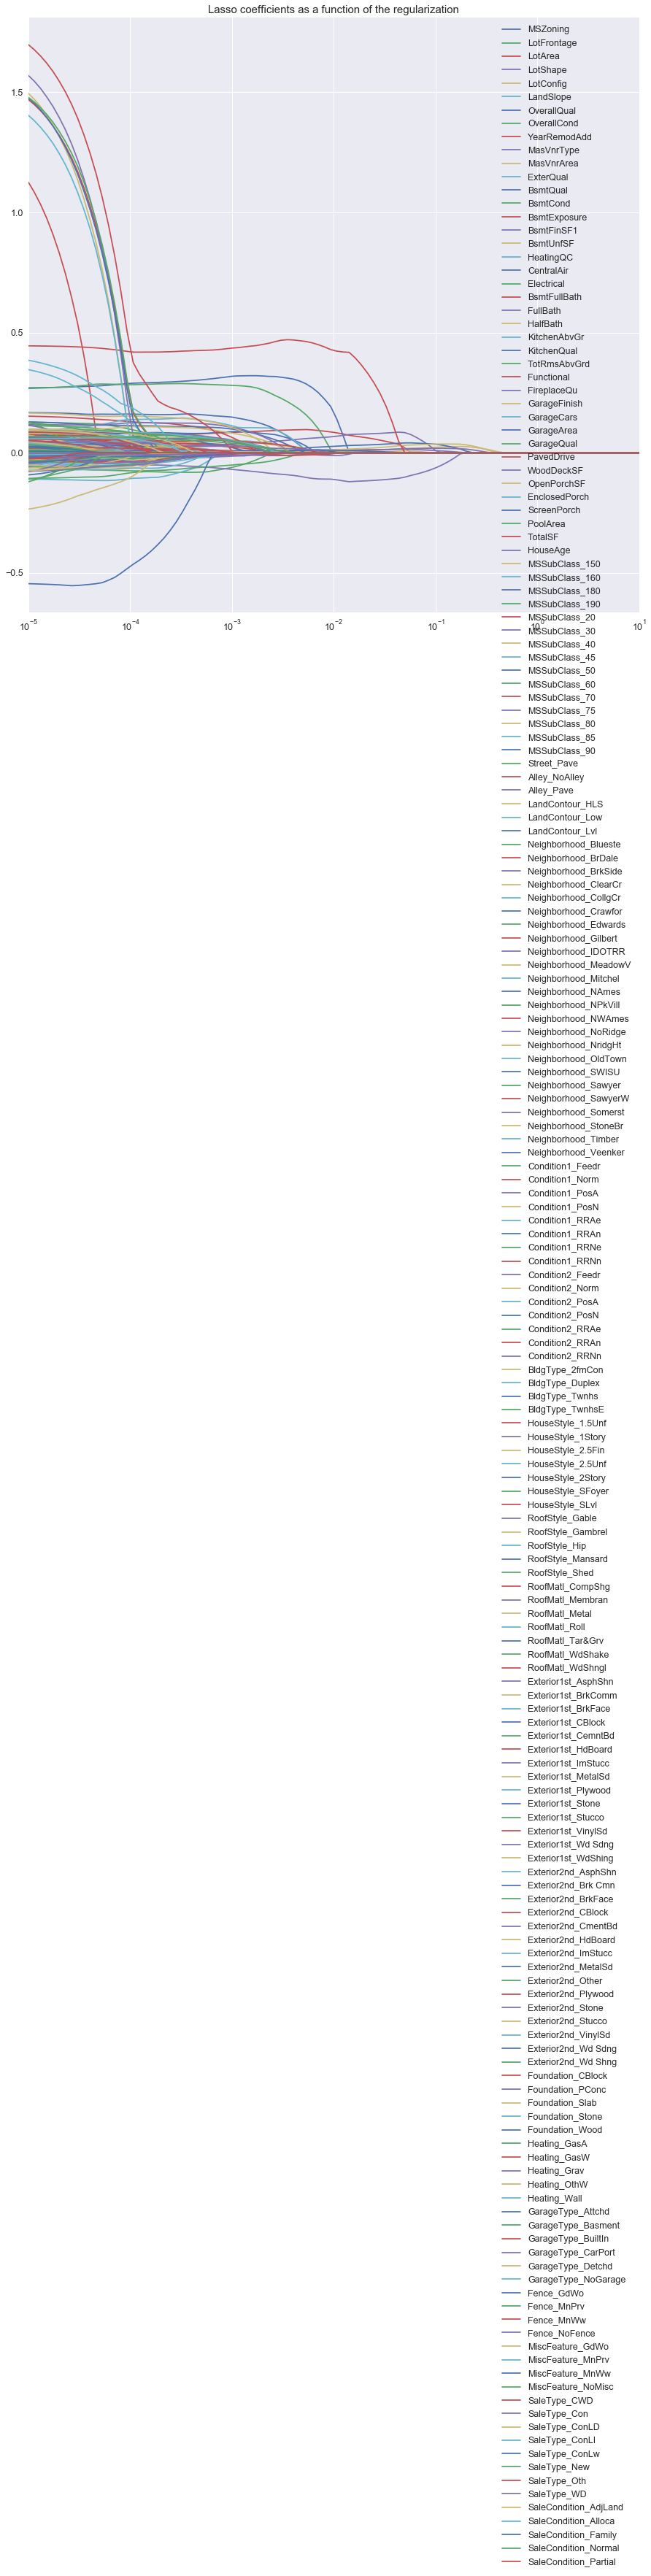

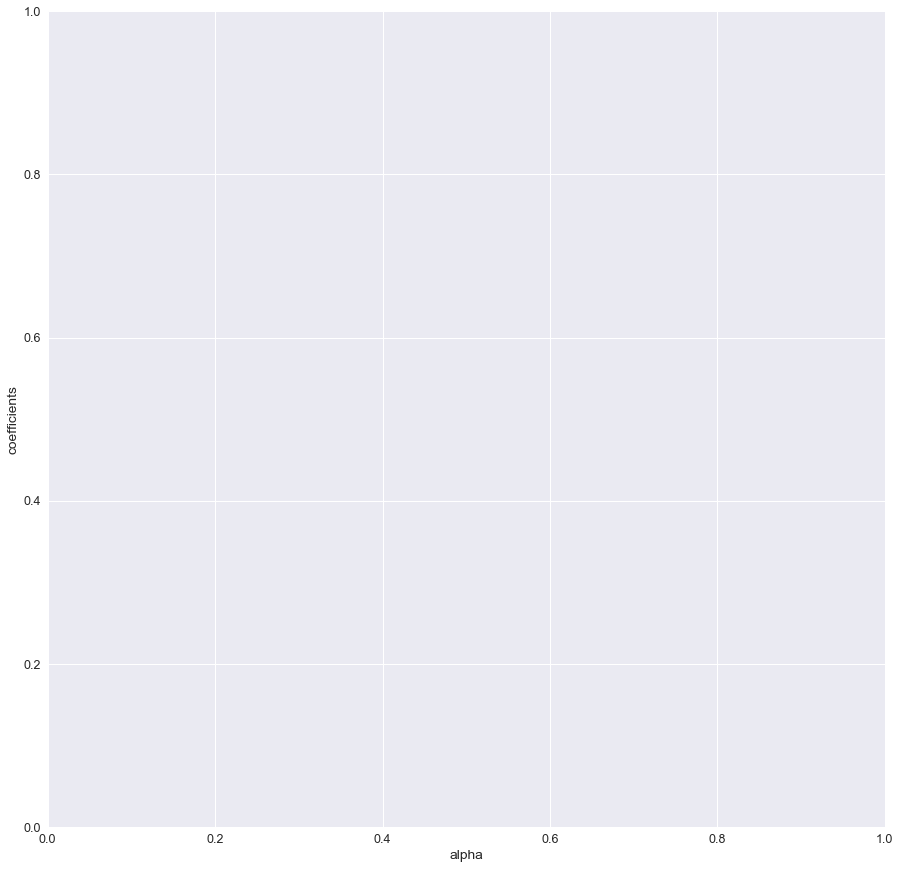

In [2333]:
columns = train_normalized_dummies.columns
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title, figsize=(15,15))
plt.figure(figsize=(15,15))
plt.xlabel('alpha')
plt.ylabel('coefficients')

plt.show()


In [2334]:
#finding the alpha at which feature goes to zero in lasso
mins = []
for c in columns:
    a = min(df_coef[(df_coef.loc[:,c] == 0)].index)
    mins.append([c, a])

In [2335]:
pd.DataFrame(mins, columns = ['Col','Alpha']).sort_values(by='Alpha')

Col     Alpha
150    Exterior2nd_Wd Sdng  0.000010
113          RoofStyle_Hip  0.000010
107      HouseStyle_2.5Unf  0.000010
48           MSSubClass_50  0.000010
98         Condition2_RRAn  0.000010
81    Neighborhood_Somerst  0.000010
157           Heating_GasA  0.000010
40          MSSubClass_150  0.000010
100        BldgType_2fmCon  0.000011
128    Exterior1st_HdBoard  0.000011
49           MSSubClass_60  0.000011
114      RoofStyle_Mansard  0.000015
149    Exterior2nd_VinylSd  0.000020
46           MSSubClass_40  0.000020
56           Alley_NoAlley  0.000020
52           MSSubClass_80  0.000020
91         Condition1_RRNe  0.000020
134    Exterior1st_VinylSd  0.000027
47           MSSubClass_45  0.000031
138    Exterior2nd_Brk Cmn  0.000031
123    Exterior1st_AsphShn  0.000035
188  SaleCondition_Partial  0.000035
115         RoofStyle_Shed  0.000035
59         LandContour_Low  0.000040
77    Neighborhood_OldTown  0.000040
127    Exterior1st_CemntBd  0.000046
80    Neighborhood_SawyerW  0.000046
162      GarageType_Attchd  0.000046
103        BldgType_TwnhsE  0.000046
129    Exterior1st_ImStucc  0.000046
..                     ...       ...
14            BsmtExposure  0.003054
25            TotRmsAbvGrd  0.003511
21                FullBath  0.003511
111        RoofStyle_Gable  0.004037
75    Neighborhood_NoRidge  0.004037
76    Neighborhood_NridgHt  0.004037
35           EnclosedPorch  0.004642
187   SaleCondition_Normal  0.004642
67    Neighborhood_Edwards  0.005337
66    Neighborhood_Crawfor  0.005337
0                 MSZoning  0.006136
29              GarageCars  0.006136
17               HeatingQC  0.007055
24             KitchenQual  0.007055
86         Condition1_Norm  0.007055
22                HalfBath  0.008111
153       Foundation_PConc  0.009326
7              OverallCond  0.010723
16               BsmtUnfSF  0.012328
6              OverallQual  0.014175
105      HouseStyle_1Story  0.016298
36             ScreenPorch  0.049770
38                 TotalSF  0.049770
2                  LotArea  0.057224
27             FireplaceQu  0.114976
15              BsmtFinSF1  0.200923
39                HouseAge  0.200923
33              WoodDeckSF  0.351119
34             OpenPorchSF  0.403702
10              MasVnrArea  0.464159

[189 rows x 2 columns]

In [2336]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
#define a function returning the cross validation rmse error 

In [2337]:
model_lasso = LassoCV(alphas = np.logspace(-5,5,100)).fit(x, y)  #using built in LassoCV to figure out best alpha 


In [2338]:
model_lasso.alpha_  #best alpha based on built in LassoCV function that tunes for you


0.00052140082879996842

In [2339]:
rmse_cv(model_lasso).mean() #cross validation is just to test for the alpha 


0.12807407233108276

In [2340]:
coef = pd.Series(model_lasso.coef_, index = train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice'])

In [2341]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 80 variables and eliminated the other 109 variables


In [2342]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])


Text(0.5,1,'Coefficients in the Lasso Model')

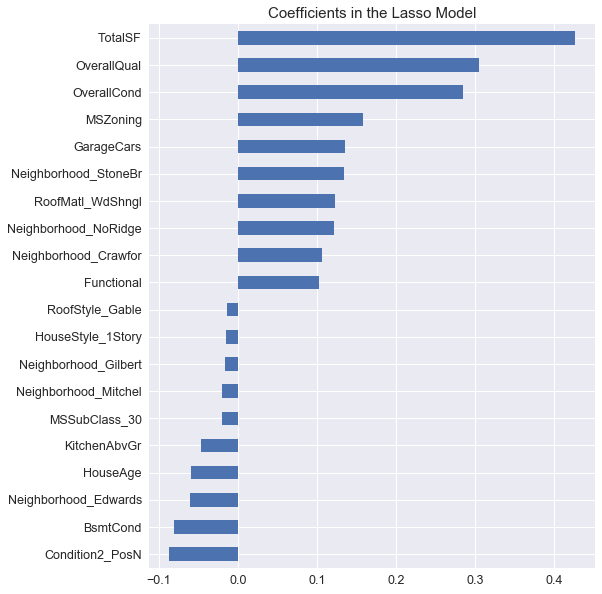

In [2343]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
#this is all the coefficients at best alpha (but just one alpha. the order will change though )

# Variance Threshold

In [2344]:
X_train_RL = train_normalized_dummies #all of dataframe minus sale price
y_RL = train_normalizedsales_dummies.SalePrice


In [2345]:
import numpy as np
import pprint


print('Shape: (%d, %d)' %X_train_RL.shape)
print('Variation:')
pprint.pprint(dict(zip(train_normalized_dummies.columns, np.var(X_train_RL, 0))))

Shape: (1460, 189)
Variation:
{'Alley_NoAlley': 0.058443891912178983,
 'Alley_Pave': 0.027293582285607007,
 'BldgType_2fmCon': 0.020782041658848123,
 'BldgType_Duplex': 0.034347907674986244,
 'BldgType_Twnhs': 0.028584631262900662,
 'BldgType_TwnhsE': 0.071985363107524056,
 'BsmtCond': 0.052903291223780666,
 'BsmtExposure': 0.134063775061422,
 'BsmtFinSF1': 8.9462453473142212,
 'BsmtFullBath': 0.12230321044569975,
 'BsmtQual': 0.077988351715431739,
 'BsmtUnfSF': 3.4350368185616609,
 'CentralAir': 0.029228159401314346,
 'Condition1_Feedr': 0.052401482454493456,
 'Condition1_Norm': 0.11822105460686892,
 'Condition1_PosA': 0.005449427659973769,
 'Condition1_PosN': 0.012844342278100737,
 'Condition1_RRAe': 0.0074774817038845516,
 'Condition1_RRAn': 0.017491086507787221,
 'Condition1_RRNe': 0.0013679864890223427,
 'Condition1_RRNn': 0.0034129292550197387,
 'Condition2_Feedr': 0.0040927003190091103,
 'Condition2_Norm': 0.010168418089697625,
 'Condition2_PosA': 0.00068446237568020899,
 'Condi

In [2346]:
import sklearn.feature_selection as fs
x_new = fs.VarianceThreshold(threshold = .001).fit_transform(X_train_RL)
x_new.shape

(1460, 176)

In [2347]:
train_tree=train_normalizedsales_dummies.copy()

In [2348]:
treecolumns = train_tree.columns

X_tree=train_tree.loc[:,train_tree.columns != 'SalePrice']

y_tree =train_tree.SalePrice

In [2349]:
train_outs3

X_trainouts=train_outs3.loc[:,train_outs3.columns !='SalePrice']
y_trainouts=train_outs3.SalePrice

In [1788]:
# Create a list of feature names
#feat_labels = train_models.columns

# Create X from the features
#X = train_models.loc[:,train_models.columns != 'SalePrice']
#train_normalized_dummies.loc[:,train_normalized_dummies.columns != 'SalePrice']
# Create y from output
#y = train_models.SalePrice

# Decision Tree

In [2350]:
#creating train test split 

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1168, 189) (1168,)
(292, 189) (292,)


In [2351]:
#WITHOUT OUTLIERS 

X_train_MO, X_test_MO, y_train_MO, y_test_MO = train_test_split(X_trainouts, y_trainouts, test_size=0.2, random_state=0)
print(X_train_MO.shape, y_train_MO.shape)
print(X_test_MO.shape, y_test_MO.shape)


(1166, 189) (1166,)
(292, 189) (292,)


In [2352]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(max_depth=5)
tree_model2 = tree.DecisionTreeRegressor(max_depth=5)

In [2353]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [2354]:
tree_model2.fit(X_train_MO, y_train_MO) #without outliers

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [2355]:
tree_model.score(X_train, y_train)

0.86348619877982113

In [2357]:
np.mean(cross_val_score(tree_model, X_tree, y_tree, cv=10))

0.77814963268627879

In [2356]:
tree_model2.score(X_train_MO,y_train_MO)

0.85979613899106655

In [2358]:
np.mean(cross_val_score(tree_model, X_trainouts, y_trainouts, cv=10)) #without outliers performed better

0.79038746832804541

In [2320]:
scores = cross_val_score(tree_model, X_train, y_train, cv=10)
scores

array([ 0.76722479,  0.82321379,  0.76137148,  0.69906939,  0.79989328,
        0.74435181,  0.76372815,  0.81620882,  0.71694911,  0.80313098])

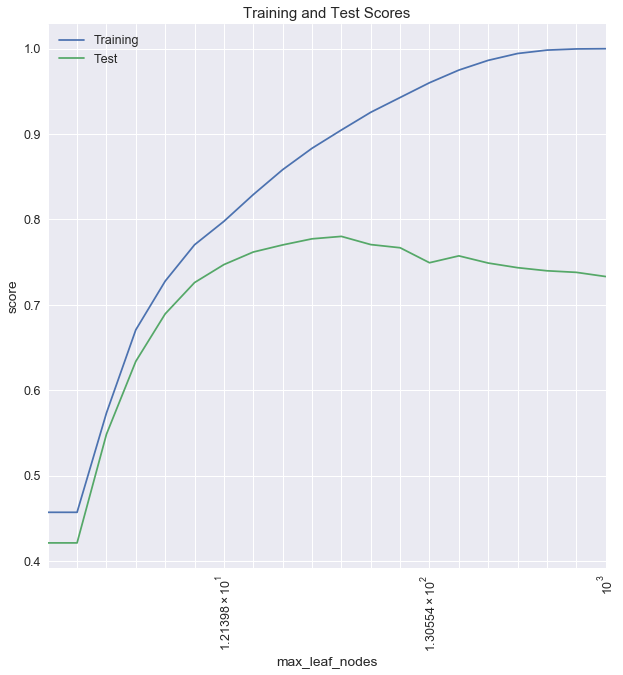

In [2321]:
scores = []
domrange = np.logspace(0.2,3,20)
for i in domrange:
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = int(round(i)))
    tree_model.fit(X_train, y_train)
    scores.append([tree_model.score(X_train, y_train),np.mean(cross_val_score(tree_model, X_train, y_train, cv=10))])
df_coef = pd.DataFrame(scores, index=domrange, columns=['Training','Test'])
title = 'Training and Test Scores'
df_coef.plot(logx=True, title=title, figsize = (10,10))
plt.xlabel('max_leaf_nodes')
plt.xticks(domrange,rotation=90)
plt.ylabel('score')
plt.show()

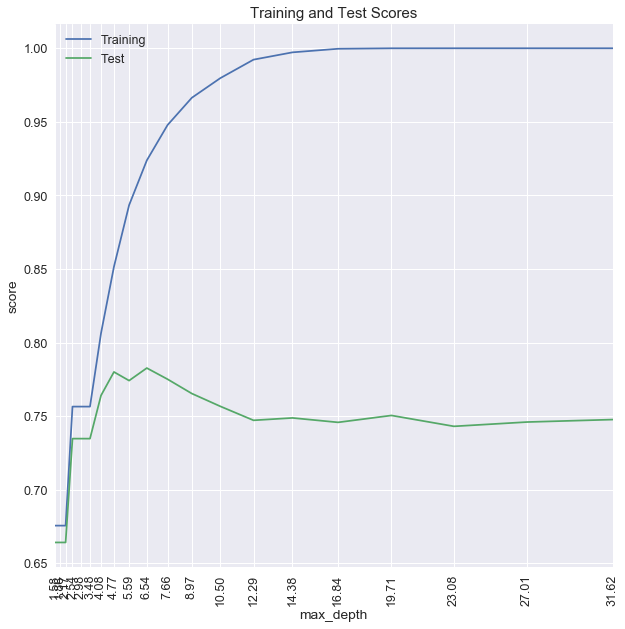

In [2323]:
scores = []
domrange = np.logspace(0.2,1.5,20)
for i in domrange:
    tree_model = tree.DecisionTreeRegressor(max_depth = int(round(i)))
    tree_model.fit(x,y)
    scores.append([tree_model.score(x,y),np.mean(cross_val_score(tree_model, x, y, cv=10))])
df_coef = pd.DataFrame(scores, index=domrange, columns=['Training','Test'])
title = 'Training and Test Scores'
df_coef.plot(title=title, figsize = (10,10))
plt.xlabel('max_depth')
plt.xticks(domrange,rotation=90)
plt.ylabel('score')
plt.show()

In [2274]:
print(tree_model.feature_importances_)

feature_importance = list(zip(X_train.columns, tree_model.feature_importances_))
dtype = [('feature', 'S15'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
feature_sort


[  1.79912570e-02   5.49692255e-03   1.67660125e-02   1.29859272e-04
   1.56308244e-04   2.85243389e-05   4.99939921e-01   1.29759895e-02
   1.27140392e-02   1.36749913e-05   3.11371822e-03   3.38081768e-04
   1.41908583e-03   6.07897509e-04   5.61165835e-03   9.47856303e-03
   9.84309743e-03   1.86144361e-03   3.50846444e-02   3.03681417e-06
   3.30858598e-04   3.43686670e-03   9.69437308e-04   2.10124235e-05
   3.22087872e-05   2.51840602e-03   5.61055359e-04   9.00193688e-03
   1.62331601e-03   2.41960937e-02   1.59072260e-02   8.88449237e-04
   3.34315073e-03   1.80314312e-03   1.05457704e-02   2.27220045e-03
   2.05943092e-06   0.00000000e+00   2.60277544e-01   4.38496704e-03
   0.00000000e+00   1.87154811e-05   0.00000000e+00   0.00000000e+00
   9.18803744e-05   1.14177780e-04   0.00000000e+00   0.00000000e+00
   1.13746589e-05   2.52550786e-05   1.37297759e-04   0.00000000e+00
   3.53444027e-04   0.00000000e+00   3.45390854e-06   0.00000000e+00
   0.00000000e+00   0.00000000e+00

array([(b'OverallQual',   4.99939921e-01), (b'TotalSF',   2.60277544e-01),
       (b'CentralAir',   3.50846444e-02),
       (b'GarageCars',   2.41960937e-02), (b'MSZoning',   1.79912570e-02),
       (b'LotArea',   1.67660125e-02), (b'GarageArea',   1.59072260e-02),
       (b'OverallCond',   1.29759895e-02),
       (b'YearRemodAdd',   1.27140392e-02),
       (b'OpenPorchSF',   1.05457704e-02),
       (b'BsmtUnfSF',   9.84309743e-03), (b'BsmtFinSF1',   9.47856303e-03),
       (b'FireplaceQu',   9.00193688e-03),
       (b'BsmtExposure',   5.61165835e-03),
       (b'LotFrontage',   5.49692255e-03), (b'HouseAge',   4.38496704e-03),
       (b'FullBath',   3.43686670e-03),
       (b'RoofStyle_Hip',   3.42436889e-03),
       (b'PavedDrive',   3.34315073e-03),
       (b'MasVnrArea',   3.11371822e-03),
       (b'TotRmsAbvGrd',   2.51840602e-03),
       (b'EnclosedPorch',   2.27220045e-03),
       (b'Neighborhood_Ol',   2.13952462e-03),
       (b'HeatingQC',   1.86144361e-03), (b'WoodDeckSF',   1

In [2359]:
print(tree_model2.feature_importances_)  #without outliers

feature_importance = list(zip(X_train_MO.columns, tree_model2.feature_importances_))
dtype = [('feature', 'S15'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
feature_sort

[  1.08174022e-02   5.19502669e-04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.81169507e-01   1.12238454e-02
   7.98207313e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.61209726e-03
   0.00000000e+00   0.00000000e+00   3.69695069e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   6.46598755e-03   2.27826203e-02   1.33902402e-02   0.00000000e+00
   8.39004079e-03   1.37620816e-03   4.46255433e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.88838414e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

array([(b'OverallQual',   5.81169507e-01), (b'TotalSF',   2.88838414e-01),
       (b'CentralAir',   3.69695069e-02),
       (b'GarageCars',   2.27826203e-02),
       (b'GarageArea',   1.33902402e-02),
       (b'OverallCond',   1.12238454e-02), (b'MSZoning',   1.08174022e-02),
       (b'PavedDrive',   8.39004079e-03),
       (b'YearRemodAdd',   7.98207313e-03),
       (b'GarageFinish',   6.46598755e-03),
       (b'BsmtFinSF1',   5.61209726e-03),
       (b'OpenPorchSF',   4.46255433e-03),
       (b'WoodDeckSF',   1.37620816e-03),
       (b'LotFrontage',   5.19502669e-04),
       (b'TotRmsAbvGrd',   0.00000000e+00),
       (b'Street_Pave',   0.00000000e+00),
       (b'ScreenPorch',   0.00000000e+00),
       (b'SaleType_WD',   0.00000000e+00),
       (b'SaleType_Oth',   0.00000000e+00),
       (b'SaleType_New',   0.00000000e+00),
       (b'SaleType_ConLw',   0.00000000e+00),
       (b'SaleType_ConLI',   0.00000000e+00),
       (b'SaleType_ConLD',   0.00000000e+00),
       (b'SaleType_Con',

# random forest


In [2360]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [2361]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

In [2364]:
train_models=train_normalizedsales_dummies.copy()


In [2365]:
train_models.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrType',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SalePrice'],
      dtype='object', length=190)

In [2366]:


# Create a list of feature names
feat_labels = train_models.columns

# Create X from the features
X = train_models.loc[:,train_models.columns != 'SalePrice']

# Create y from output
y = train_models.SalePrice

In [2367]:
# Split the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [2368]:
# Create a random forest regressor
clf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the regressor
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('MSZoning', 0.010527776160155339)
('LotFrontage', 0.0077584144660658005)
('LotArea', 0.014761246880270978)
('LotShape', 0.0025935529472121614)
('LotConfig', 0.00019168850327205779)
('LandSlope', 0.00052534895535817768)
('OverallQual', 0.36445403685879829)
('OverallCond', 0.013885029581533585)
('YearRemodAdd', 0.012831116768851522)
('MasVnrType', 0.00027077364626722743)
('MasVnrArea', 0.0035132442716427157)
('ExterQual', 0.0014985251088703406)
('BsmtQual', 0.0054859303954982765)
('BsmtCond', 0.00072625203132739645)
('BsmtExposure', 0.0020813220774329949)
('BsmtFinSF1', 0.0099494550638775641)
('BsmtUnfSF', 0.01044473134056886)
('HeatingQC', 0.0016810569553580405)
('CentralAir', 0.023052413215809212)
('Electrical', 0.00052264218708397345)
('BsmtFullBath', 0.00087441957242819477)
('FullBath', 0.0018469887980759872)
('HalfBath', 0.001243628086801514)
('KitchenAbvGr', 0.0028083012017485905)
('KitchenQual', 0.0074060134902593586)
('TotRmsAbvGrd', 0.0028459148928931715)
('Functional', 0.00204

In [2369]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.005)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.005)

In [2370]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


MSZoning
LotFrontage
LotArea
OverallQual
OverallCond
YearRemodAdd
BsmtQual
BsmtFinSF1
BsmtUnfSF
CentralAir
KitchenQual
GarageCars
GarageArea
TotalSF
HouseAge


In [2371]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [2372]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [2373]:


# View The Accuracy Of Our Full Feature (4 Features) Model
clf.score(X_test, y_test)

0.87167485618622464

In [2374]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
clf_important.score(X_important_test, y_test)

0.86930172622600943

In [2375]:
clf.set_params(oob_score=True, random_state=42)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [2376]:
clf.oob_score_

0.88305343139602011

In [2377]:
clf.score(X_test,y_test)

0.87210275324752595

In [2378]:
# Create a new random forest classifier for the most important features
rf_wo_outliers = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_wo_outliers.fit(X_train_MO, y_train_MO)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [2379]:
np.mean(cross_val_score(clf, X_train, y_train, cv=10))

0.88346832559638622

In [2380]:
np.mean(cross_val_score(clf, X_test, y_test, cv=10))

0.81302730756725805

In [2381]:
np.mean(cross_val_score(clf, X, y, cv=10))

0.87822928000129896

In [2383]:
np.mean(cross_val_score(rf_wo_outliers, X_train_MO, y_train_MO, cv=10)) #WITHOUT OUTLIERS

KeyboardInterrupt: 

In [1920]:
np.mean(cross_val_score(rf_wo_outliers, X_test_MO, y_test_MO, cv=10)) #WITHOUT OUTLIERS

0.88486152003836727

In [2384]:
np.mean(cross_val_score(rf_wo_outliers, X_trainouts, y_trainouts, cv=10)) #WITHOUT OUTLIERS

KeyboardInterrupt: 

# PCA

In [2385]:
train_PCA=train_normalizedsales_dummies.copy()
#train_normalized_dummies.columns[train_normalized_dummies.columns!='SalePrice']

In [2386]:
train_PCA=train_PCA.loc[:,train_PCA.columns != 'SalePrice']

In [2387]:
pca.set_params()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [2388]:
pca.components_

array([[ -1.67495657e-02,  -1.65248603e-02,  -2.57864464e-02, ...,
          4.08925902e-04,   3.36695713e-03,  -1.03624024e-02],
       [  4.86897064e-03,   8.81424368e-03,   5.67507698e-03, ...,
         -5.64898515e-04,  -2.07725582e-02,   2.72372118e-02],
       [  2.69198880e-03,   7.63945405e-03,  -6.20075346e-03, ...,
         -9.22251230e-06,  -1.57728305e-02,   1.40649848e-02],
       ..., 
       [ -0.00000000e+00,  -5.97631321e-17,   3.40246260e-17, ...,
         -8.19310593e-17,  -4.86233301e-17,  -1.00214447e-16],
       [ -0.00000000e+00,  -9.81807082e-18,  -2.58915800e-17, ...,
         -1.59587360e-16,  -4.90802866e-17,  -2.31072973e-16],
       [  0.00000000e+00,   5.14723601e-17,  -1.73833932e-17, ...,
          2.99066363e-18,   1.27621076e-18,   3.30080211e-16]])

In [2389]:
pca.explained_variance_ratio_

array([  2.39917702e-01,   1.78894999e-01,   1.18627563e-01,
         8.81657812e-02,   6.11398419e-02,   5.42789881e-02,
         4.16311723e-02,   3.84713735e-02,   2.17886044e-02,
         1.44428763e-02,   1.22205731e-02,   8.40482032e-03,
         7.45422199e-03,   7.06680032e-03,   6.40459814e-03,
         5.71631556e-03,   5.33787024e-03,   4.74712788e-03,
         4.44991275e-03,   3.88853812e-03,   3.45735501e-03,
         3.26246472e-03,   3.09309309e-03,   2.79632248e-03,
         2.61304044e-03,   2.37028519e-03,   2.21631344e-03,
         2.08437842e-03,   2.01226562e-03,   1.94792897e-03,
         1.85663197e-03,   1.78518007e-03,   1.66191178e-03,
         1.59682117e-03,   1.53588955e-03,   1.47671519e-03,
         1.38332113e-03,   1.36895778e-03,   1.26201633e-03,
         1.21690215e-03,   1.19519822e-03,   1.14576335e-03,
         1.12355141e-03,   1.08590751e-03,   1.04879165e-03,
         1.00300012e-03,   9.56536483e-04,   9.16179157e-04,
         8.93122273e-04,

In [2390]:
pca.mean_ 

array([  1.03660544e+00,   4.21633205e+00,   9.11292329e+00,
         4.36184227e-01,   4.56954905e-02,   6.52792721e-01,
         1.93870182e+00,   1.86869963e+00,   7.59366867e+00,
         2.67051568e-01,   2.08397870e+00,   1.20706885e+00,
         1.47240970e+00,   1.35326878e+00,   8.94884420e-01,
         4.20298852e+00,   5.66313246e+00,   1.39122988e+00,
         6.46858242e-01,   1.55336932e+00,   2.89759653e-01,
         9.18958168e-01,   2.64980301e-01,   7.10750723e-01,
         1.23540906e+00,   1.99800777e+00,   2.05543267e+00,
         7.78038119e-01,   9.44847653e-01,   9.76603975e-01,
         5.83965516e+00,   1.30842670e+00,   1.01666828e+00,
         2.42756723e+00,   2.33214443e+00,   7.20724207e-01,
         4.04870147e-01,   2.19853157e-02,   7.80476172e+00,
         3.26847990e+00,   0.00000000e+00,   4.53767123e-02,
         5.13698630e-03,   2.05479452e-02,   3.68150685e-01,
         4.79452055e-02,   2.56849315e-03,   9.41780822e-03,
         9.84589041e-02,

In [2391]:
#transformation. Apply PCA to the dataset

data_pca = pca.transform(X_train)
data_pca

array([[ -2.37896702e+00,   2.64860484e+00,   5.30392233e+00, ...,
          1.86902427e-18,   3.50794132e-17,   3.56713900e-17],
       [  5.47197505e+00,   7.05271458e-01,   5.98473258e-01, ...,
         -4.27659386e-17,  -5.21693713e-17,  -9.48048966e-18],
       [  2.12879804e+00,  -4.73781942e+00,   3.72672413e-01, ...,
         -4.45006620e-17,  -1.41073949e-16,  -1.13130217e-16],
       ..., 
       [  4.98202893e+00,  -1.04043345e+00,  -2.15306550e-01, ...,
         -7.48583229e-17,  -2.44289996e-16,   1.39382773e-17],
       [  5.00240777e-01,   5.32651263e+00,  -1.36797735e+00, ...,
         -3.40923212e-17,   7.01286337e-17,   2.34792564e-17],
       [  2.00135460e+00,   4.31961687e+00,   3.19982954e+00, ...,
          7.34605343e-17,   2.32910999e-17,  -1.64193836e-17]])

In [2392]:
np.dot(data_pca - pca.mean_,  pca.components_.T)

array([[  6.25622408e+00,  -2.26433570e+00,  -1.10703464e+00, ...,
          8.61788541e-02,   2.56479873e-02,  -9.46658738e-02],
       [  7.17797448e+00,  -8.97910256e-01,  -6.64244614e-01, ...,
          4.21350652e-02,  -2.08342902e-02,  -7.14134199e-03],
       [  6.62193340e+00,  -2.22930655e+00,  -5.41749681e-01, ...,
         -4.94372699e-03,  -8.84660023e-02,  -1.07570295e-02],
       ..., 
       [  6.66589535e+00,  -1.77822555e+00,  -4.27577117e-01, ...,
          7.51353007e-02,   1.28793607e-01,   7.73101990e-02],
       [  6.97461199e+00,  -1.83793801e+00,  -4.55657563e-01, ...,
          7.39493185e-02,   3.44365678e-02,   2.12920459e-02],
       [  6.33164158e+00,  -1.24413395e+00,  -1.00812237e-01, ...,
         -2.56259755e-02,   9.56672403e-02,  -7.96656687e-02]])

In [2393]:
pca.inverse_transform(data_pca) == X_train  ### What's wrong with this code?

MSZoning  LotFrontage  LotArea  LotShape  LotConfig  LandSlope  \
618      False        False     True     False      False      False   
870      False        False    False     False      False      False   
92       False        False     True     False      False      False   
817      False        False     True     False      False      False   
302      False        False     True     False      False      False   
1454     False        False     True     False      False      False   
40        True        False     True     False      False      False   
959      False        False    False     False      False       True   
75       False        False    False     False      False      False   
1389     False        False    False     False      False      False   
1254     False         True     True     False      False      False   
689      False        False     True     False      False       True   
648      False        False     True     False      False      False   
247      False        False     True     False      False      False   
1308     False         True    False     False      False      False   
1164     False         True    False     False      False      False   
708      False        False     True     False      False      False   
186      False        False    False     False      False      False   
156      False        False    False     False      False      False   
914      False        False     True      True      False      False   
8        False        False     True     False      False      False   
390      False        False    False     False      False      False   
1333     False        False    False     False      False      False   
1441     False        False     True     False      False      False   
619      False        False     True     False      False      False   
771      False        False    False     False      False      False   
465      False        False     True     False      False      False   
1248     False        False    False     False      False      False   
431      False        False    False     False      False      False   
1288     False         True     True     False      False      False   
...        ...          ...      ...       ...        ...        ...   
1435      True        False    False     False      False      False   
1201     False         True    False     False      False      False   
99       False         True     True     False      False      False   
850      False        False     True     False      False      False   
448      False        False     True     False      False      False   
755      False        False     True     False      False      False   
976      False        False    False     False      False      False   
115      False        False    False     False      False      False   
777      False        False     True     False      False      False   
72        True        False     True     False      False      False   
845      False        False    False     False      False      False   
537      False        False    False     False      False      False   
849      False         True     True     False      False      False   
174      False        False    False     False      False      False   
87       False        False    False     False      False      False   
551      False         True     True     False      False      False   
705      False        False    False     False      False      False   
314      False        False    False     False      False      False   
1420     False        False    False     False      False      False   
600      False         True     True     False      False       True   
1094     False        False     True     False      False      False   
599      False        False    False     False      False      False   
277      False         True     True     False      False      False   
1033     False        False     True     False

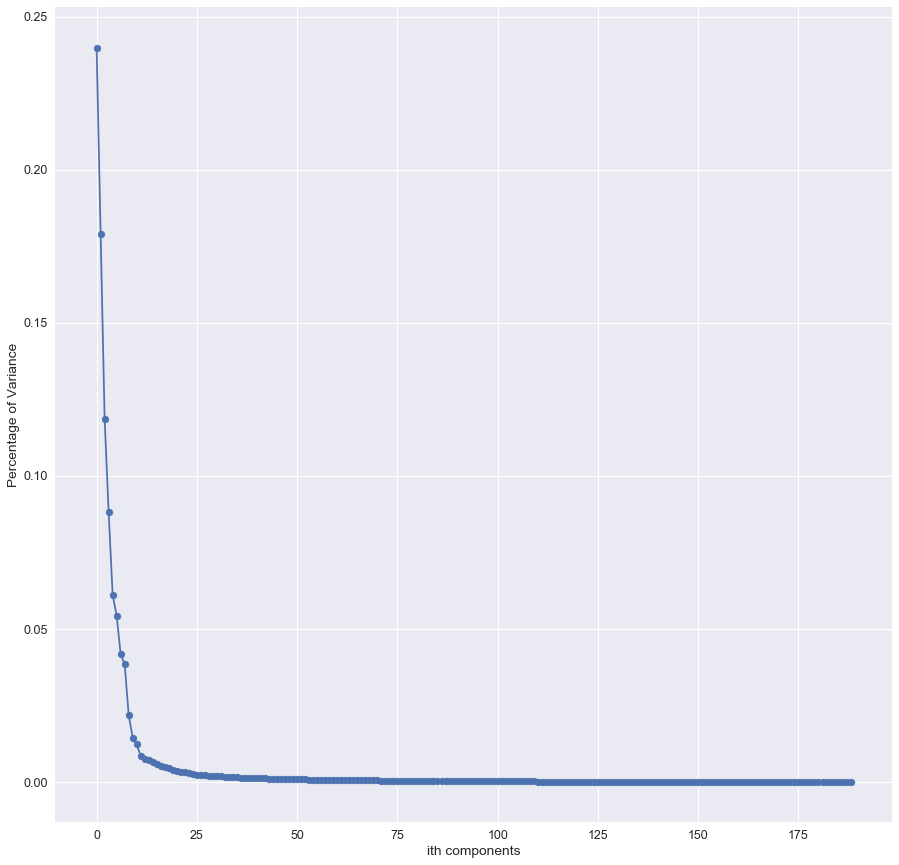

In [2394]:
plt.figure(figsize=(15,15))
pca.set_params(n_components=None)
pca.fit(X_train)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.scatter(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [1825]:
#x_train_scale = X_train / np.std(X_train, axis=0)

In [1826]:
#from collections import Counter
#Counter(train_df.LotArea)


In [1827]:
#x_train_scale['Condition2_PosA'].unique()
#X_train['Condition2_PosA'].unique()

In [1828]:
#x_train_scale
#pd.set_option('display.max_columns', 500)
#x_train_scale

In [1829]:
#pca.set_params()
#pca.fit(x_train_scale)

# Linear Model

In [2397]:
lm = linear_model.LinearRegression()
lm2= linear_model.LinearRegression() #without outliers
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2398]:
lm2.fit(X_train_MO,y_train_MO) #without outliers

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2399]:
lm2.score(X_train_MO,y_train_MO)

0.93631403703210114

In [2400]:
lm.score(X_train,y_train)

0.94081112130903299

In [2401]:
np.mean(cross_val_score(lm, X_train, y_train, cv=10))

0.89525901481699588

In [2402]:
np.mean(cross_val_score(lm, X_test, y_test, cv=10))

-2.9174618408760824e+23

In [2403]:
np.mean(cross_val_score(lm, X, y, cv=10))

0.84878731730243384

In [2405]:
np.mean(cross_val_score(lm2, X_train_MO, y_train_MO, cv=10)) #WITHOUT OUTLIERS

0.89173053710250483

In [2406]:
np.mean(cross_val_score(lm2, X_test_MO, y_test_MO, cv=10)) #WITHOUT OUTLIERS

-5.9778084913986675e+22

In [2407]:
np.mean(cross_val_score(lm2, X_trainouts, y_trainouts, cv=10)) #WITHOUT OUTLIERS

0.902390582931206

# Ridge Regression

In [2410]:
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(X_train, y_train) # fit data
ridge.coef_, ridge.intercept_ 

(array([  1.54805292e-01,   2.60642709e-02,   9.48296372e-02,
          1.88058891e-03,   4.34416964e-02,  -2.50995449e-02,
          2.68743858e-01,   2.62700384e-01,   5.66914525e-02,
         -1.23754722e-02,   4.01327920e-03,   1.22150121e-02,
          4.69074937e-03,  -8.44223554e-02,   3.39128810e-02,
          8.91697644e-03,  -5.48002129e-03,   5.90492732e-02,
          7.64013036e-02,  -2.96252431e-02,   5.25091942e-02,
          9.11938335e-02,   6.08433905e-02,  -9.53771467e-02,
          8.63663301e-02,   6.34617757e-02,   1.01498025e-01,
          2.30634258e-02,   1.25497197e-02,   9.08275434e-02,
          1.20613079e-02,   5.99675376e-02,   9.47574926e-03,
          5.01628162e-03,   2.57179546e-03,   2.99860592e-03,
          5.64567324e-03,   2.04998396e-02,   4.19650271e-01,
         -5.97256857e-02,   0.00000000e+00,  -2.19467039e-02,
          4.03712289e-02,  -3.93900455e-02,   5.60955554e-03,
         -3.42774495e-02,   3.22150108e-02,  -4.33868032e-02,
        

In [2408]:
ridge2 = linear_model.Ridge(alpha = 1) # create a ridge regression instance (WITHOUT OUTLIERS)
ridge2.fit(X_train_MO, y_train_MO) # fit data
ridge2.coef_, ridge2.intercept_ 

(array([  1.48033123e-01,   1.03854681e-02,   1.02706376e-01,
          3.24749604e-03,   3.08794641e-02,  -1.28171194e-02,
          2.32178861e-01,   2.71806837e-01,   7.03414396e-02,
          1.47482516e-02,   1.25022301e-03,   3.16833779e-02,
          6.84857469e-03,  -1.08148813e-01,   4.88404824e-02,
          8.10049061e-03,  -4.79380085e-03,   5.82402712e-02,
          7.39606860e-02,  -2.14494252e-02,   4.90862688e-02,
          9.61887077e-02,   7.33763937e-02,  -8.02712753e-02,
          1.07750326e-01,   7.38598785e-02,   1.40740410e-01,
          2.59957612e-02,   7.27303859e-03,   9.56744718e-02,
          4.46642330e-03,   6.95461003e-02,   1.61046354e-02,
          3.38017195e-03,   5.16908575e-04,   2.85592929e-03,
          7.79699375e-03,   3.21691277e-02,   4.28320661e-01,
         -5.72909916e-02,   0.00000000e+00,  -2.57534281e-02,
          3.70423145e-02,  -2.80952601e-02,   1.24780473e-02,
         -2.59391262e-02,  -2.65507582e-02,  -3.73664357e-02,
        

In [2411]:
print("The determination of ridge regression is: %.4f" %ridge.score(X, y))

The determination of ridge regression is: 0.9178


In [2412]:
print("The determination of ridge regression without outliers is: %.4f" %ridge2.score(X_trainouts, y_trainouts))

The determination of ridge regression without outliers is: 0.9328


In [2413]:
alpha_100 = np.logspace(0, 8, 100)
#coef = []
#for i in alpha_100:
#    ridge.set_params(alpha = i)
#    ridge.fit(X, y)
#    coef.append(ridge.coef_)

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrType',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [2419]:
columns = X_train.columns
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
import matplotlib.pyplot as plt
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx=True, title=title, figsize=(15,15))
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')
plt.show()

ValueError: Shape of passed values is (1, 100), indices imply (189, 100)

In [2420]:
np.mean(cross_val_score(ridge, X, y, cv=10))

0.88877769765504444

In [2421]:
np.mean(cross_val_score(ridge, X_train, y_train, cv=10))

0.90265885605328289

In [2422]:
np.mean(cross_val_score(ridge, X_test, y_test, cv=10))

0.78371101127891929

In [2423]:
np.mean(cross_val_score(ridge2, X_train_MO, y_train_MO, cv=10)) #WITHOUT OUTLIERS

0.90013813736200421

In [2424]:
np.mean(cross_val_score(ridge2, X_test_MO, y_test_MO, cv=10)) #WITHOUT OUTLIERS

0.87238593018085309

In [2425]:
np.mean(cross_val_score(ridge2, X_trainouts, y_trainouts, cv=10)) #WITHOUT OUTLIERS

0.90978543654998434

# SVM

In [2429]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=1e3, gamma = .00002)
regressor.fit(X_train,y_train)
regressor2 = SVR(kernel = 'rbf', C=1e3, gamma = .00002)
regressor2.fit(X_train_MO,y_train_MO)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [2427]:
regressor.score(X_train,y_train)

0.92508430790883422

In [2428]:
np.mean(cross_val_score(regressor, X, y, cv=10))

0.89627252094599041

In [2430]:
regressor2.score(X_train_MO,y_train_MO)

0.92739719418427324

In [2431]:
np.mean(cross_val_score(regressor2, X_trainouts, y_trainouts, cv=10)) #without outliers did better 

0.91246248826642051

# XGBoost

In [2432]:
xgb = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
xgb.fit(X_train,y_train)

xgb2 = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
xgb2.fit(X_train_MO,y_train_MO)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_gamma=1, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [2433]:
xgb.score(X_train,y_train)

0.95740498327680446

In [2434]:
xgb.score(X_test,y_test)

0.88603712108174149

In [2435]:
np.mean(cross_val_score(xgb, X_train, y_train, cv=10))

0.90300450875380789

In [2436]:
np.mean(cross_val_score(xgb, X_test, y_test, cv=10))

0.81739350039002479

In [2437]:
np.mean(cross_val_score(xgb, X, y, cv=10))

0.89651791289407545

In [2438]:
np.mean(cross_val_score(xgb2, X_train_MO, y_train_MO, cv=10)) #without outliers

0.89195376003137028

In [2439]:
np.mean(cross_val_score(xgb2, X_trainouts, y_trainouts, cv=10)) #without outliers performs better

0.90546203262144453

# Gradient Boosting Regressor

In [2444]:

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))    

0.021301891808518693

In [2441]:
est2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train_MO, y_train_MO)


In [2445]:
est.score(X_train,y_train)

0.89293014333524645

In [2446]:
est.score(X_test,y_test)

0.85929878604296084

In [2447]:
np.mean(cross_val_score(est, X_train, y_train, cv=10))

0.87004670274758167

In [2448]:
np.mean(cross_val_score(est, X_test, y_test, cv=10))

0.80316054574536389

In [2449]:
np.mean(cross_val_score(est, X, y, cv=10))

0.86278311768299465

In [2451]:
np.mean(cross_val_score(est2, X_trainouts, y_trainouts, cv=10)) #slightlyt better without outliers 

0.87463947494484662

# Lasso + XGBoost Combind

In [2452]:
y_train_MO.shape

(1166,)

In [2453]:
llm_out_t = linear_model.LassoCV(alphas=np.logspace(-5,1,20), max_iter=2000)
llm_out_t.fit(X_train_MO,y_train_MO)
xgb_out_t = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
xgb_out_t.fit(X_train_MO,y_train_MO)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_gamma=1, reg_lambda=1.5, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [2454]:
y_llm_out_pred = llm_out_t.predict(X_test_MO)
y_xgb_out_pred = xgb_out_t.predict(X_test_MO)
y_out_pred = (y_llm_out_pred + y_xgb_out_pred)/2

In [2457]:
metrics.r2_score(y_test_MO,y_llm_out_pred)

0.93149320011599457

In [2458]:
metrics.r2_score(y_test_MO,y_xgb_out_pred)

0.92549221664590464

In [2460]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [2461]:
rmsle(np.exp(y_test_MO)-1, np.exp(y_out_pred)-1)

0.1025719864246402

In [2462]:
np.set_printoptions(threshold=np.nan)

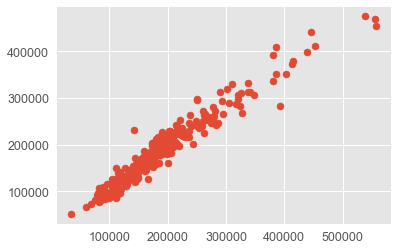

In [2463]:
p = np.stack([np.exp(y_test_MO)-1,np.exp(y_llm_out_pred)-1,np.exp(y_xgb_out_pred)-1,np.exp(y_out_pred)-1],axis=1)
plt.figure()
plt.scatter(p[:,0],p[:,3])

# Stacked Generalization

In [2496]:
x_stack = np.array(X_trainouts)
y_stack = np.array(y_trainouts)

In [2483]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

In [2501]:
RANDOM_SEED = 42
svr_stacked = SVR(kernel = 'rbf', C=1e3, gamma = .00002)
xgb_stacked = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
rf_stacked = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED, n_jobs=-1)
lm_stacked = linear_model.LinearRegression()

In [2502]:
# The StackingCVRegressor uses scikit-learn's check_cv
# internally, which doesn't support a random seed. Thus
# NumPy's random seed need to be specified explicitly for
# deterministic behavior
np.random.seed(RANDOM_SEED)
stack = StackingCVRegressor(regressors=(svr_stacked, xgb_stacked, rf_stacked, lm_stacked),
                            meta_regressor=lm_stacked)


In [2503]:
print('5-fold cross validation scores:\n')

for clf, label in zip([svr_stacked, xgb_stacked, rf_stacked, lm_stacked, stack], ['SVM', 'XGB', 
                                                'Random Forest', 'Linear', 
                                                'StackingCVRegressor']):
    scores = cross_val_score(clf, x_stack, y_stack, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

R^2 Score: 0.91 (+/- 0.00) [SVM]
R^2 Score: 0.90 (+/- 0.01) [XGB]
R^2 Score: 0.88 (+/- 0.01) [Random Forest]
R^2 Score: 0.90 (+/- 0.01) [Linear]
R^2 Score: 0.92 (+/- 0.01) [StackingCVRegressor]


In [2505]:
np.random.seed(RANDOM_SEED)
stack = StackingCVRegressor(regressors=(svr_stacked, xgb_stacked, rf_stacked, lm_stacked),
                            meta_regressor=lm_stacked)

print('5-fold cross validation scores:\n')

for clf, label in zip([svr_stacked, xgb_stacked, rf_stacked, lm_stacked, stack], ['SVM', 'XGB', 
                                                'Random Forest', 'Linear', 
                                                'StackingCVRegressor']):
    scores = cross_val_score(clf, x_stack, y_stack, cv=5, scoring='neg_mean_squared_error')
    print("Neg. MSE Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

Neg. MSE Score: -0.01 (+/- 0.00) [SVM]
Neg. MSE Score: -0.02 (+/- 0.00) [XGB]
Neg. MSE Score: -0.02 (+/- 0.00) [Random Forest]
Neg. MSE Score: -0.02 (+/- 0.00) [Linear]
Neg. MSE Score: -0.01 (+/- 0.00) [StackingCVRegressor]


In [ ]:
#creating matrices for sklearn:
#train_normalized_dummies = alldata_normalized_dummies[:train_df.shape[0]]
#test_normalized_dummies = alldata_normalized_dummies[train_df.shape[0]:]
#y = train_df.SalePrice

In [2506]:
test_normalized_dummies.shape

(1459, 189)

In [2512]:
stack.fit(x_stack, y_stack)

StackingCVRegressor(cv=5,
          meta_regressor=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
          refit=True,
          regressors=(SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0...=0, warm_start=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
          shuffle=True, store_train_meta_features=False,
          use_features_in_secondary=False)

In [2514]:
test_np=np.array(test_normalized_dummies)

In [2515]:
y_stack_out_pred = stack.predict(test_np)


In [2524]:
y_stack_out_pred

array([ 11.68910101,  12.07169696,  12.12976073,  12.1562217 ,
        12.24307966,  11.96821528,  12.11852844,  12.01418523,
        12.11202708,  11.73260283,  12.08279847,  11.52773879,
        11.45878874,  11.97283304,  11.68346415,  12.72540383,
        12.50634439,  12.48060819,  12.51596996,  12.93161713,
        12.74663   ,  12.26469391,  12.16532638,  12.03619991,
        12.1257238 ,  12.202379  ,  12.66324048,  12.38827274,
        12.28916185,  12.25831962,  12.20198083,  11.38915163,
        12.07574085,  12.65041031,  12.63200695,  12.38111673,
        12.05643666,  12.05189185,  11.95149665,  11.97354608,
        12.06477176,  11.97268106,  12.60327897,  12.35246665,
        12.29529057,  12.21670837,  12.42771038,  12.1600586 ,
        11.9929443 ,  11.89085109,  11.94960893,  12.08614161,
        11.80300975,  12.09097969,  12.12034412,  11.95241219,
        11.96908577,  11.82940256,  12.40179276,  11.81107388,
        11.79351752,  12.01179734,  11.67374033,  11.66

In [2525]:
y_stack_normal=np.exp(y_stack_out_pred)-1

In [2526]:
y_stack_normal

array([ 119263.74038749,  174851.31183773,  185304.43324938,
        190273.24422795,  207539.05943146,  157662.02457617,
        183234.67372576,  165078.95758244,  182047.25782037,
        124566.47632143,  176803.24966044,  101491.35872705,
         94729.25748051,  158391.75886948,  118593.35315319,
        336179.61323221,  270044.13423525,  263182.87011352,
        272656.02433566,  413170.1232234 ,  343391.71083791,
        212073.71322988,  192013.54043715,  168753.43766269,
        184557.87603105,  199261.63309943,  315917.79434104,
        239969.84986136,  217326.74669755,  210726.1854342 ,
        199182.30894932,   88356.96498638,  175559.82555131,
        311890.39316692,  306203.03798626,  238258.74771461,
        172203.26904437,  171422.40884791,  155048.0263685 ,
        158504.73974204,  173644.60705904,  158367.68803227,
        297531.56826615,  231529.4439136 ,  218662.77731668,
        202137.49765386,  249622.82891106,  191004.71048997,
        161609.48470299,

In [2528]:
data = np.vstack([np.arange(1461,2920), y_stack_normal])
data.T.shape

(1459, 2)

In [2529]:
f = pd.DataFrame(data.T, columns=['Id','SalePrice'])
f['Id'] = list(map(lambda x:int(x), f['Id']))

In [2531]:
f.to_csv('ktsubmission.csv', index =False)

In [ ]:
#stacked try 2 

In [2533]:
RANDOM_SEED = 42
metreg = linear_model.LassoCV(alphas=np.logspace(-5,5,10), max_iter=2000)
svr_stacked2 = SVR(kernel = 'rbf', C=1e3, gamma = .00002)
xgb_stacked2 = XGBRegressor(reg_alpha=0, reg_gamma=1, reg_lambda=1.5)
lm_stacked2 = linear_model.LinearRegression()

np.random.seed(RANDOM_SEED)
stack2 = StackingCVRegressor(regressors=(svr_stacked2, xgb_stacked2, lm_stacked2),
                            meta_regressor=metreg)


In [2534]:
print('5-fold cross validation scores:\n')

for clf, label in zip([svr_stacked2, xgb_stacked2, lm_stacked2, stack2], ['SVM', 'XGB', 'Linear', 
                                                'StackingCVRegressor']):
    scores2 = cross_val_score(clf, x_stack, y_stack, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores2.mean(), scores2.std(), label))

5-fold cross validation scores:

R^2 Score: 0.91 (+/- 0.00) [SVM]
R^2 Score: 0.90 (+/- 0.01) [XGB]
R^2 Score: 0.90 (+/- 0.01) [Linear]
R^2 Score: 0.92 (+/- 0.01) [StackingCVRegressor]


In [2535]:
stack2.fit(x_stack, y_stack)

StackingCVRegressor(cv=5,
          meta_regressor=LassoCV(alphas=array([  1.00000e-05,   1.29155e-04,   1.66810e-03,   2.15443e-02,
         2.78256e-01,   3.59381e+00,   4.64159e+01,   5.99484e+02,
         7.74264e+03,   1.00000e+05]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=2000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
          refit=True,
          regressors=(SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0...nt=True, subsample=1), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
          shuffle=True, store_train_meta_features=False,
          use_features_in_secondary=Fals

In [2536]:
y_stack_out_pred2 = stack2.predict(test_np)

In [2537]:
y_stack_normal2=np.exp(y_stack_out_pred2)-1

In [2538]:
data2 = np.vstack([np.arange(1461,2920), y_stack_normal2])
data2.T.shape

(1459, 2)

In [2539]:
f2 = pd.DataFrame(data2.T, columns=['Id','SalePrice'])
f2['Id'] = list(map(lambda x:int(x), f2['Id']))

In [2540]:
f2.to_csv('ktsubmission2.csv', index =False)